# Data analysis with Python

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("weatherAUS.csv") 

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
# check null 

pd.DataFrame({"Null":(df.isnull().sum()/df.shape[0]) *100}).sort_values("Null", ascending=False) 

,Null
Sunshine,47.406528
Evaporation,41.685460
Cloud3pm,29.139466
Cloud9am,28.735905
Pressure3pm,15.572700
Pressure9am,15.537092
WindGustDir,11.762611
WindGustSpeed,11.762611
WindDir9am,9.839763
WindDir3pm,3.655786


In [10]:
df.duplicated().sum()

1663

### target

,RainTomorrow
No,0.735312
Yes,0.236320
NaN,0.028368


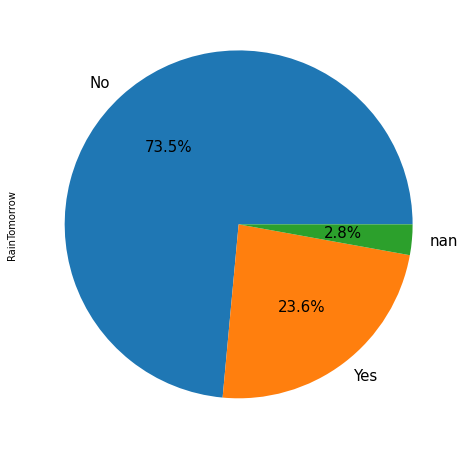

In [11]:
df.RainTomorrow.value_counts(dropna=False).plot(kind="pie", autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainTomorrow.value_counts(dropna=False, normalize=True).to_frame() 

In [12]:
# drop na of RainTomorrow

df.dropna(subset=["RainTomorrow"], inplace=True) 

In [13]:
# ubah format nilai RainTomorrow ke int 
rain = {"Yes":1,"No":0}

df.RainTomorrow = df.RainTomorrow.replace(rain).astype("int") 

,RainTomorrow
0,0.75678
1,0.24322


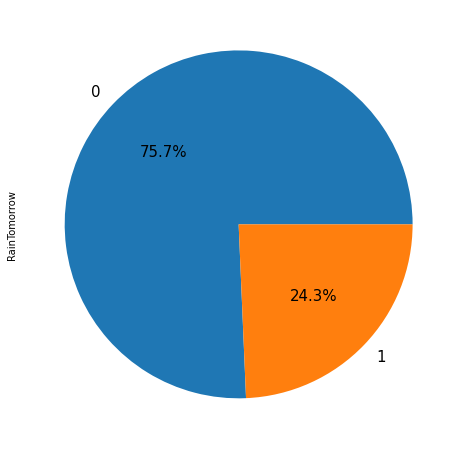

In [14]:
# after dropna 

df.RainTomorrow.value_counts(dropna=False).plot(kind="pie", autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainTomorrow.value_counts(dropna=False, normalize=True).to_frame() 

## Univariat analysis & Bivariat Analysis

In [15]:
# pisahkan sesuai kategori

In [16]:
cater = df.select_dtypes("object").columns
number = df.select_dtypes("number").columns

## Categorical features

In [17]:
df[cater].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,8186,8186,7233,7377,7900,8079
unique,2966,12,16,16,16,2
top,2011-02-03,Melbourne,N,N,SE,No
freq,5,1502,689,869,797,6120


### Date 

In [18]:
df["Date"] = pd.to_datetime(df.Date) 

In [19]:
date = df.Date.dt.strftime("%Y-%m") 

Text(0, 0.5, 'RainTomorrow ')

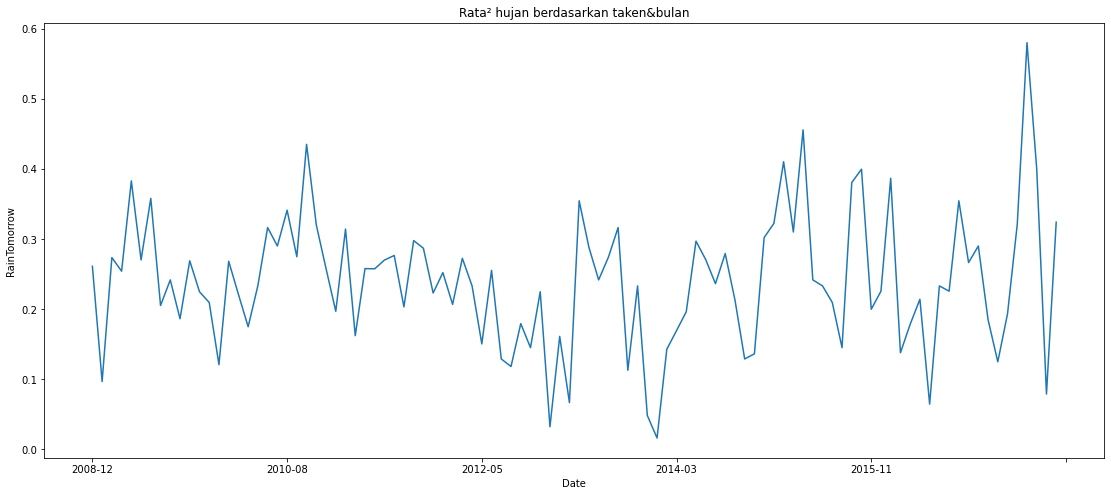

In [20]:
df.groupby(date)["RainTomorrow"].mean().plot(figsize=(19, 8)) 
plt.title("Rata² hujan berdasarkan taken&bulan") 
plt.xlabel("Date") 
plt.ylabel("RainTomorrow ") 

In [21]:
# extract year from date

In [22]:
# extract year from date 
year = df.Date.dt.year

In [23]:
year.value_counts().sort_index().to_frame()

,Date
2008,88
2009,1234
2010,1436
2011,1356
2012,892
2013,543
2014,945
2015,632
2016,670
2017,390


Text(0.5, 0, 'Years')

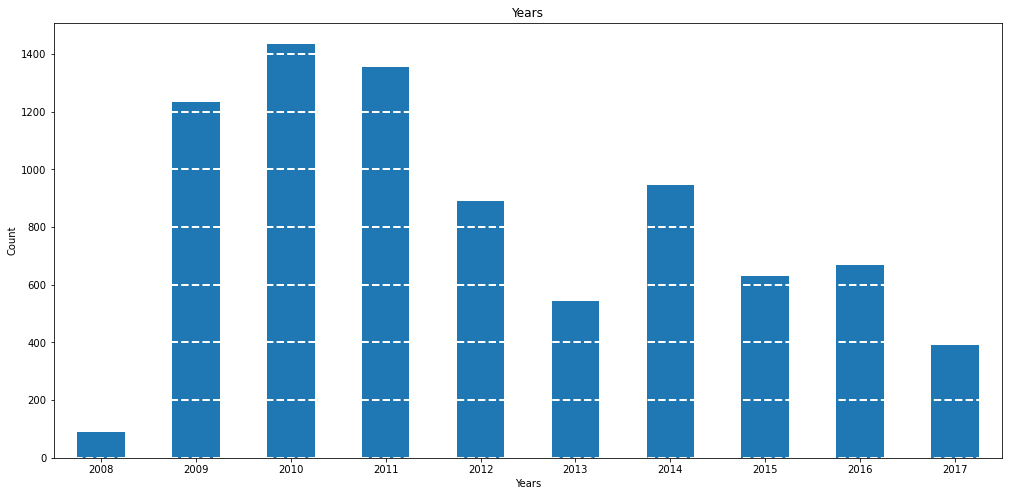

In [24]:
# plot 
year.value_counts().sort_index().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Years") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("Years")


In [25]:
# rata² hujan berdasarkan year 

df.groupby(year)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Date,
2008,0.261364
2009,0.253647
2010,0.270891
2011,0.246313
2012,0.197309
2013,0.200737
2014,0.206349
2015,0.281646
2016,0.229851


Text(0.5, 0, 'Years')

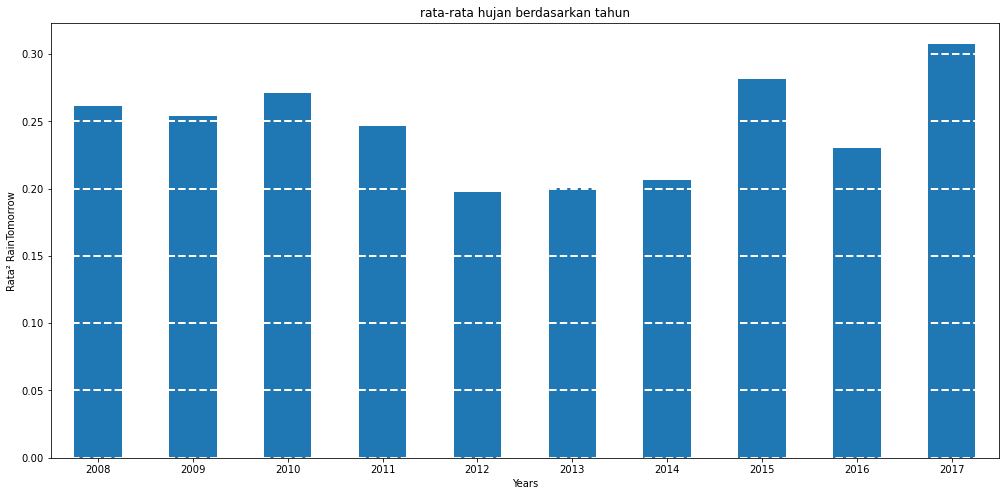

In [26]:
# plot 
df.groupby(year)["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan tahun") 
plt.ylabel("Rata² RainTomorrow") 
plt.xticks(rotation=0) 
plt.xlabel("Years")


In [27]:
# rata RainTomorrow ter banyak ada di tahun  2007


In [28]:
df["Years"] = df.Date.dt.year.astype("object") 

In [29]:
# filter 2007
df.query("Years == 2007")["RainTomorrow"].value_counts().to_frame() 

,RainTomorrow


In [30]:
df.Years.describe()

count     8186
unique      10
top       2010
freq      1436
Name: Years, dtype: int64

In [31]:
# binning years untuk mencegah high cardinality

bins = [2007,2010, 2012,2017]
year_bin = pd.cut(df.Years, bins=bins) 

In [32]:
year_bin.value_counts()

(2012, 2017]    3180
(2007, 2010]    2758
(2010, 2012]    2248
Name: Years, dtype: int64

In [33]:
df.groupby(year_bin)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Years,
"(2007, 2010]",0.262872
"(2010, 2012]",0.226868
"(2012, 2017]",0.237736


In [34]:
# extract months

In [35]:
months = df.Date.dt.month.astype("object") 

In [36]:
months.describe()

count     8186
unique      12
top          6
freq       800
Name: Date, dtype: int64

In [37]:
months.value_counts().sort_index().to_frame() 

,Date
1,740
2,600
3,744
4,589
5,799
6,800
7,719
8,669
9,605
10,631


Text(0.5, 0, 'Months')

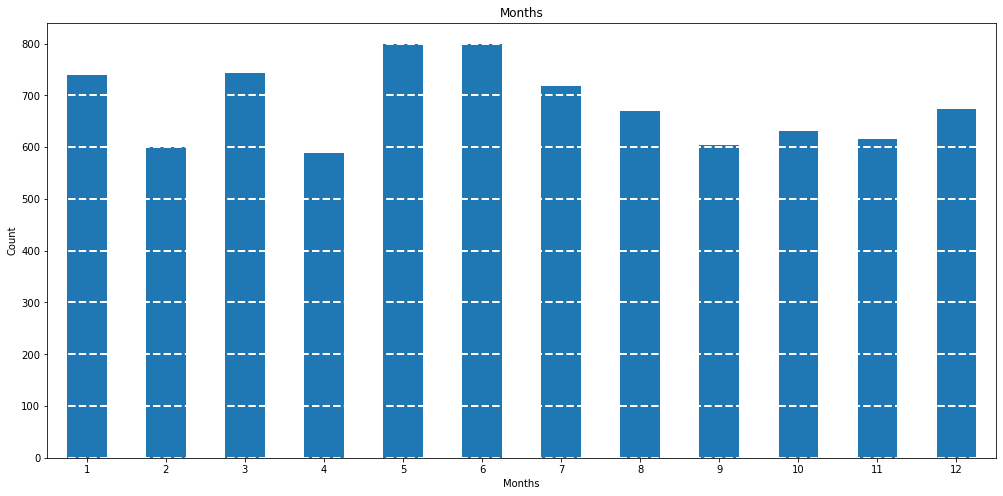

In [38]:
# plot 
months.value_counts().sort_index().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Months") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("Months")


In [39]:
# rata² hujan berdasarkan bulan 

df.groupby(months)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Date,
1,0.183784
2,0.266667
3,0.247312
4,0.276740
5,0.217772
6,0.287500
7,0.229485
8,0.258595
9,0.238017


Text(0.5, 0, 'Months')

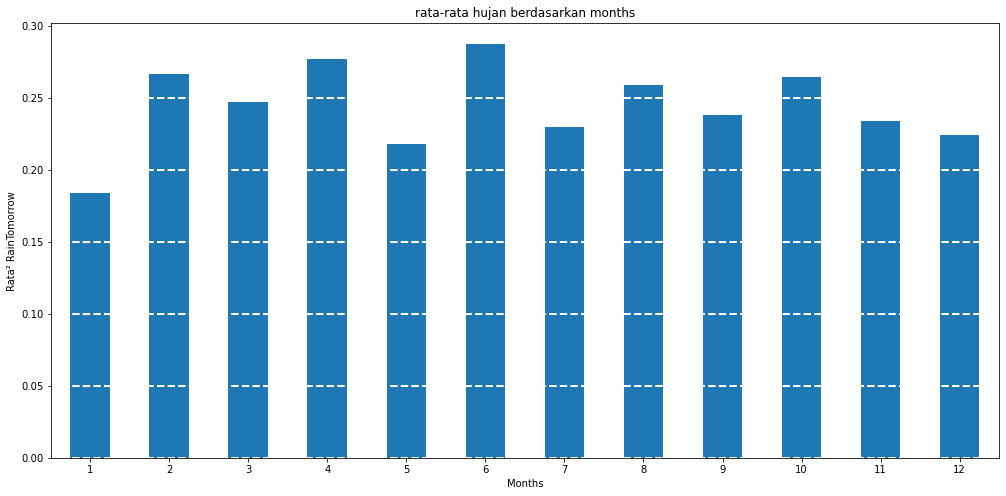

In [40]:
# plot 
df.groupby(months)["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan months") 
plt.ylabel("Rata² RainTomorrow") 
plt.xticks(rotation=0) 
plt.xlabel("Months")


In [41]:
df["Months"] = df.Date.dt.month.astype("object") 

In [42]:
# extract tanggal

In [43]:
# extract tanggal 

tgl = df.Date.dt.day.astype("object") 

In [44]:
tgl.describe()

count     8186
unique      31
top         20
freq       279
Name: Date, dtype: int64

In [45]:
tgl.value_counts().sort_index() 

1     266
2     270
3     270
4     265
5     264
6     269
7     269
8     269
9     270
10    268
11    266
12    263
13    269
14    266
15    271
16    272
17    268
18    268
19    270
20    279
21    275
22    270
23    269
24    274
25    273
26    261
27    268
28    268
29    251
30    245
31    160
Name: Date, dtype: int64

In [46]:
# rata² hujan berdasarkan tanggal

df.groupby(tgl)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Date,
1,0.248120
2,0.233333
3,0.292593
4,0.264151
5,0.261364
6,0.249071
7,0.226766
8,0.234201
9,0.281481


In [47]:
df["date"] = df.Date.dt.day.astype("object")

In [48]:
#extract hari 

In [49]:
days = df.Date.dt.day_name() 

In [50]:
days.describe() 

count       8186
unique         7
top       Sunday
freq        1191
Name: Date, dtype: object

In [51]:
days.value_counts().to_frame()

,Date
Sunday,1191
Wednesday,1189
Tuesday,1185
Monday,1184
Thursday,1177
Saturday,1133
Friday,1127


Text(0.5, 0, 'Days')

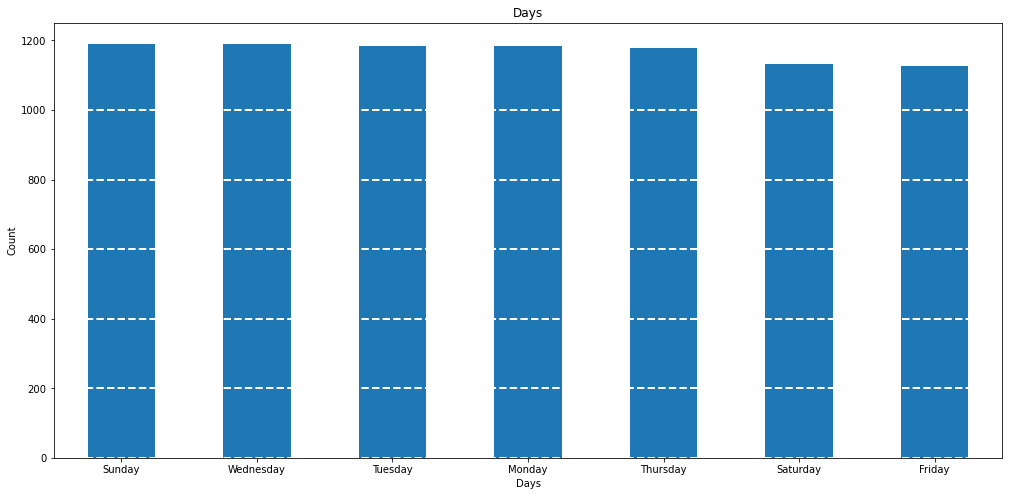

In [52]:
# plot 
days.value_counts().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Days") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("Days")


In [53]:
# rata² hujan berdasarkan hari

df.groupby(days)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Date,
Friday,0.239574
Monday,0.232264
Saturday,0.233892
Sunday,0.249370
Thursday,0.236194
Tuesday,0.261603
Wednesday,0.248949


Text(0.5, 0, 'Days')

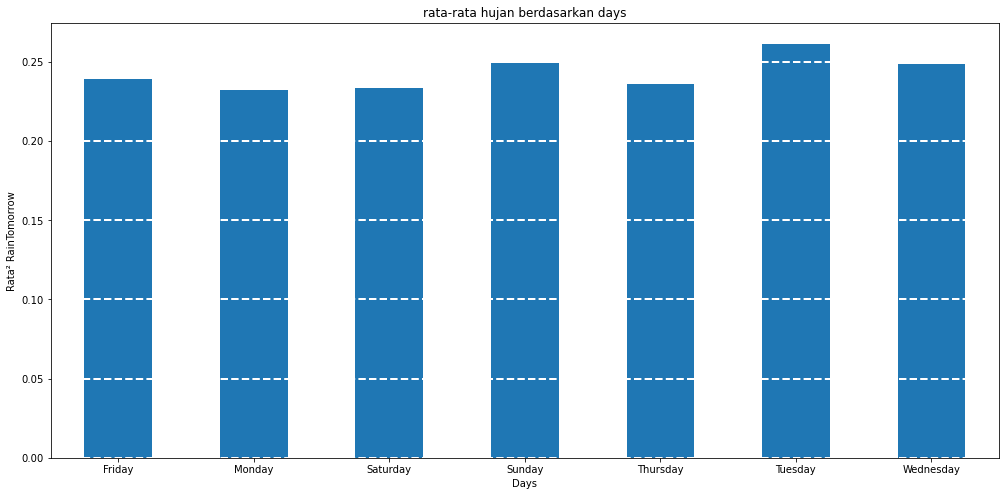

In [54]:
# plot 
df.groupby(days)["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan days") 
plt.ylabel("Rata² RainTomorrow") 
plt.xticks(rotation=0) 
plt.xlabel("Days")


In [55]:
df["Days"] = df.Date.dt.day_name()

### Location

In [57]:
# plt.figure(figsize=(15,15))
# wordcloud = WordCloud(
#     background_color='white',
#     width = 2000,
#     height = 1200
# ).generate_from_frequencies(df["Location"].value_counts()) 
# plt.title("Location")
# plt.imshow(wordcloud)
# plt.axis('off')

In [58]:
location = df.groupby("Location")["RainTomorrow"].mean().sort_values(ascending=False).to_frame() 

In [59]:
# top 10 location paling tinggi rata² hujan

location.head(10) 

,RainTomorrow
Location,
CoffsHarbour,0.304918
Melbourne,0.270306
Wollongong,0.269231
Williamtown,0.265165
Newcastle,0.245050
Penrith,0.242171
Brisbane,0.235192
Adelaide,0.223881
Albury,0.221604


In [60]:
# top 10 dari bawah location paling rendah rata² hujan

location.tail(10) 

,RainTomorrow
Location,
Wollongong,0.269231
Williamtown,0.265165
Newcastle,0.245050
Penrith,0.242171
Brisbane,0.235192
Adelaide,0.223881
Albury,0.221604
PerthAirport,0.200997
Darwin,0.128000


### WindGustDir winddir9am winddir3pm

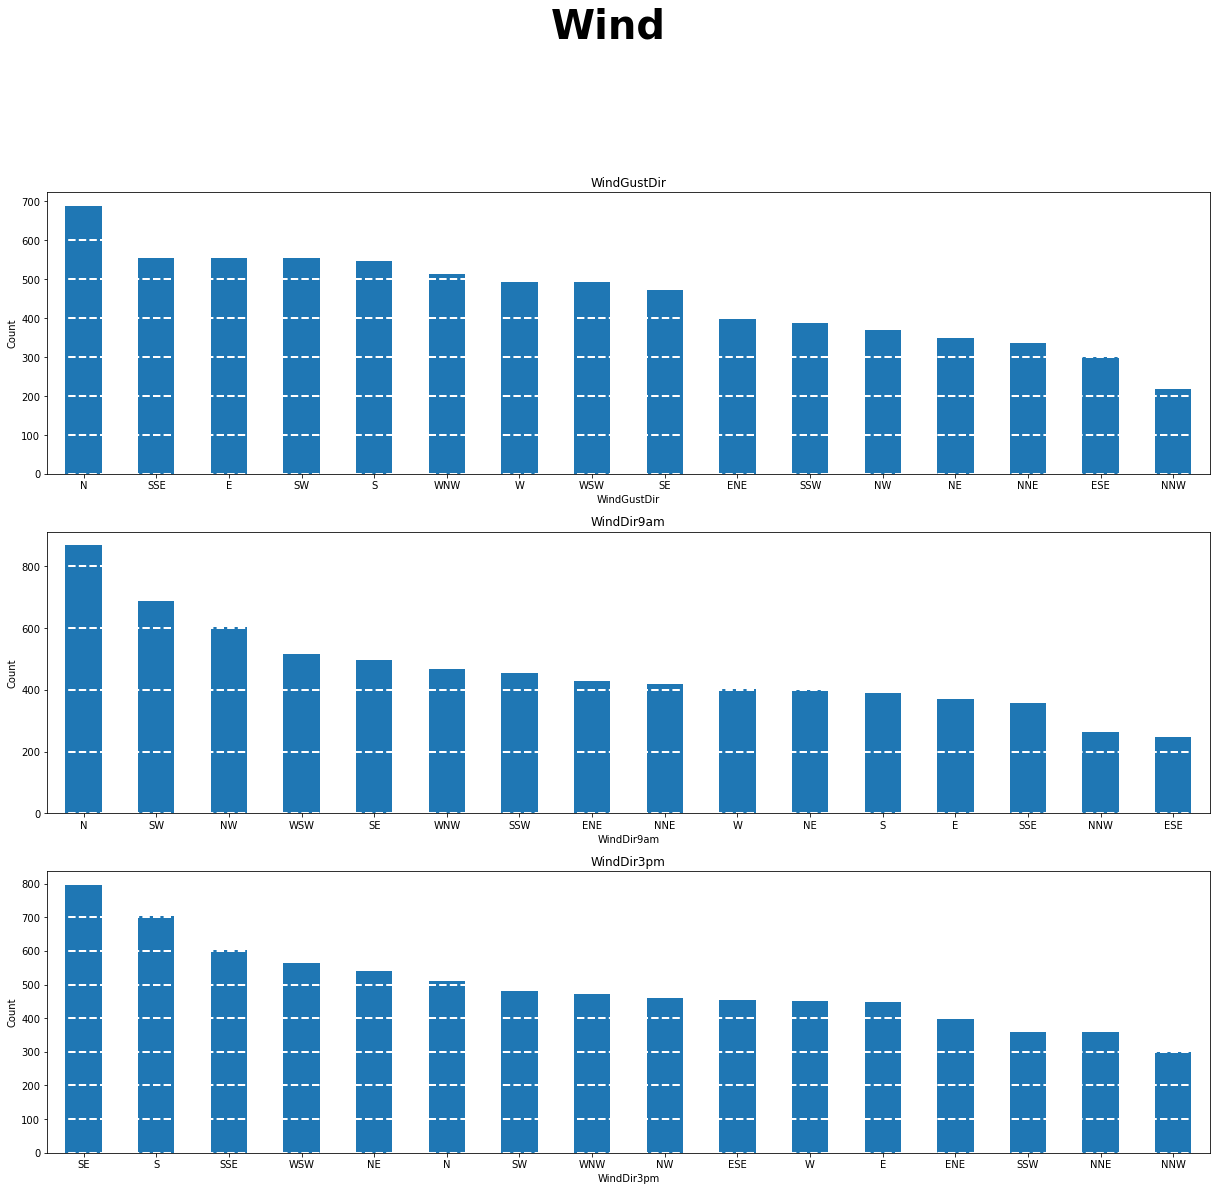

In [61]:
# plot 
plt.subplot(311)
df.WindGustDir.value_counts().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindGustDir") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindGustDir")

plt.subplot(312)
df.WindDir9am.value_counts().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir9am") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindDir9am")

plt.subplot(313)
df.WindDir3pm.value_counts().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir3pm") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindDir3pm")

plt.suptitle("Wind", y=1.1, size=40,fontweight="bold") 
plt.tight_layout()


In [62]:
# rata² hujan berdasarkan windgustdir

df.groupby("WindGustDir")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
WindGustDir,
NNW,0.292237
SSW,0.291237
N,0.287373
WSW,0.281947
NW,0.275676
SW,0.274368
S,0.268739
NNE,0.264095
WNW,0.262646


In [63]:
# rata² hujan berdasarkan winddir3pm

df.groupby("WindDir3pm")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
WindDir3pm,
SSW,0.362117
NNW,0.361204
N,0.280943
NW,0.275488
S,0.254623
WSW,0.245115
SW,0.236515
NNE,0.231198
SE,0.225847


In [64]:
# rata² hujan berdasarkan winddir9am

df.groupby("WindDir9am")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
WindDir9am,
N,0.342923
WNW,0.291845
SW,0.287373
W,0.277228
NNE,0.273810
NNW,0.272727
SSW,0.256071
ESE,0.250000
WSW,0.240777


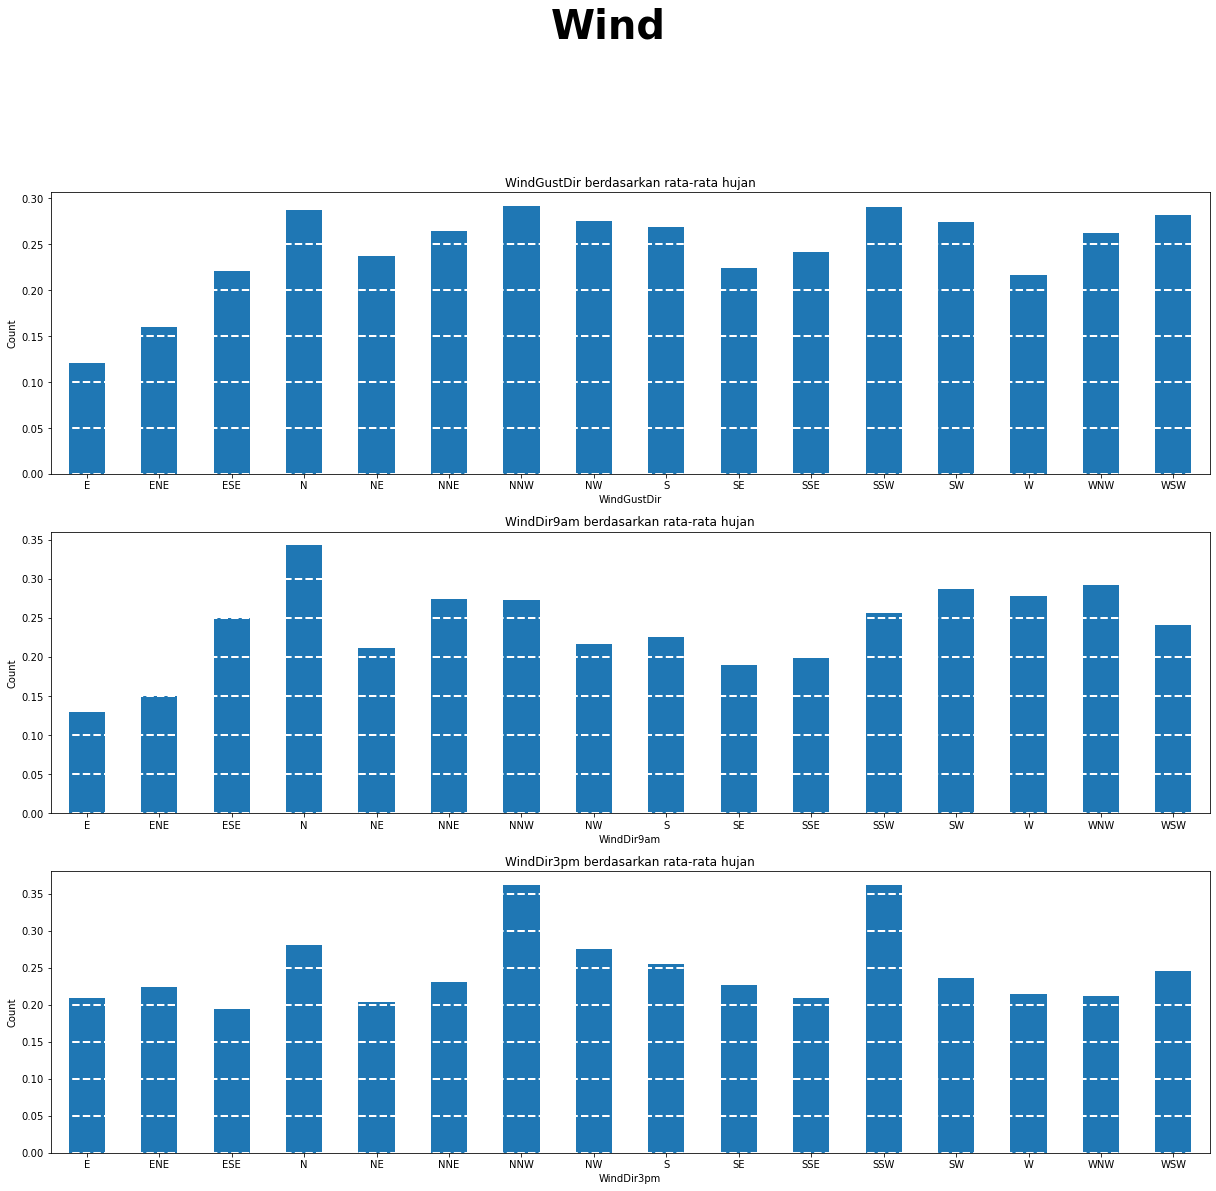

In [65]:
# plot 
plt.subplot(311)
df.groupby("WindGustDir")["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindGustDir berdasarkan rata-rata hujan") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindGustDir")

plt.subplot(312)
df.groupby("WindDir9am")["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir9am berdasarkan rata-rata hujan") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindDir9am")

plt.subplot(313)
df.groupby("WindDir3pm")["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir3pm berdasarkan rata-rata hujan") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindDir3pm")

plt.suptitle("Wind", y=1.1, size=40,fontweight="bold") 
plt.tight_layout()


In [66]:
# check sebab-akibat location & windgustdir

df.groupby(["Years","Months"])["WindGustDir"].describe()["top"].to_frame().sample(20) 

top
Years Months     
2013  10        W
2012  1         E
2015  9       NNE
2011  3         E
2009  11        N
      5       SSE
2012  8       ENE
2016  5       WNW
      10      WNW
2013  9        NW
2012  4         E
2010  7         N
2017  3       SSW
2009  12      SSE
2013  6        NE
2016  11      SSE
2011  12      SSE
2010  2         N
      12       SW
2015  10        E

In [67]:
# fillna berdasarkan tahun&bulan 

df["WindGustDir"] = df.groupby(["Years","Months"])["WindGustDir"].apply(lambda x: x.fillna(x.mode()[0]))
df["WindDir3pm"] = df.groupby(["Years","Months"])["WindDir3pm"].apply(lambda x: x.fillna(x.mode()[0]))
df["WindDir9am"] = df.groupby(["Years","Months"])["WindDir9am"].apply(lambda x: x.fillna(x.mode()[0]))


### raintoday 

,RainToday
No,0.747618
Yes,0.239311
NaN,0.013071


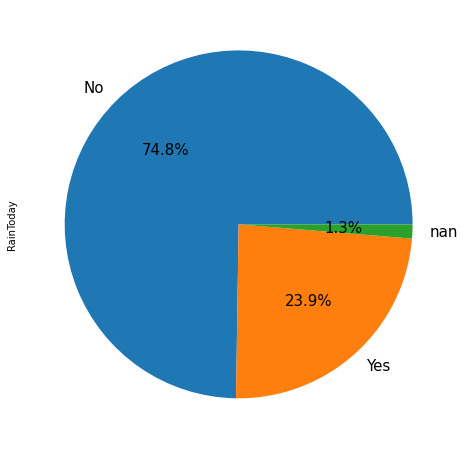

In [68]:
df.RainToday.value_counts(dropna=False).plot(kind="pie", autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainToday.value_counts(dropna=False, normalize=True).to_frame() 

In [69]:
# fillna dwngan mode 
df["RainToday"].fillna("No", inplace=True) 

,RainToday
No,0.760689
Yes,0.239311


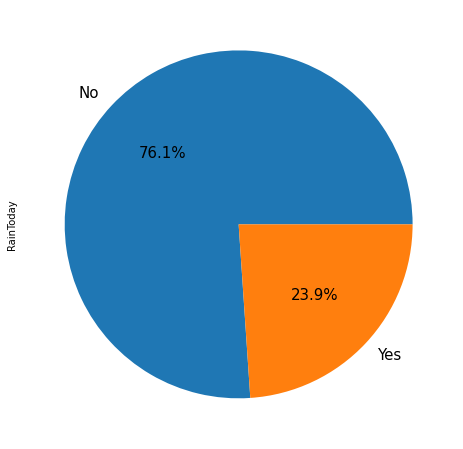

In [70]:
# after fillna

df.RainToday.value_counts(dropna=False).plot(kind="pie", autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainToday.value_counts(dropna=False, normalize=True).to_frame() 

In [71]:
df.groupby("RainToday")["RainTomorrow"].value_counts(normalize=True).to_frame()

RainTomorrow
RainToday RainTomorrow              
No        0                 0.832182
          1                 0.167818
Yes       0                 0.517101
          1                 0.482899

Text(0.5, 0, 'RainToday')

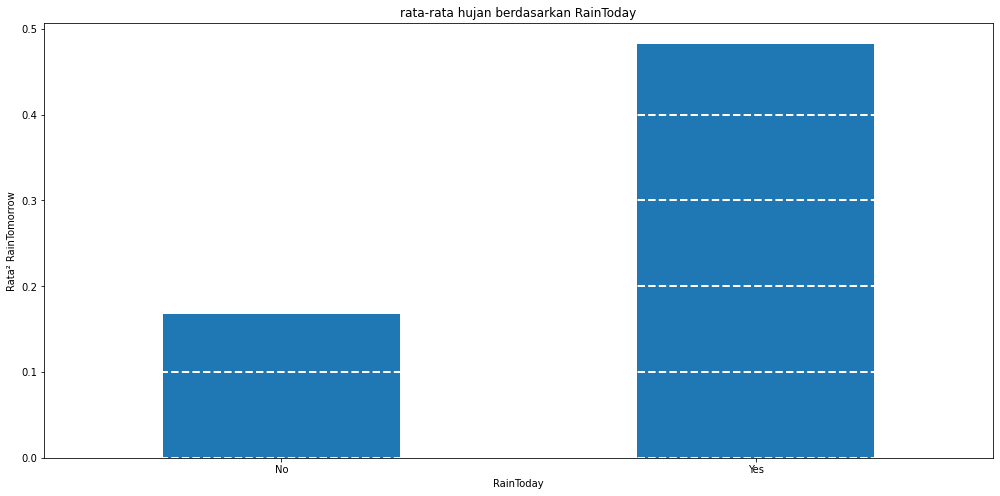

In [72]:
# plot 
df.groupby("RainToday")["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan RainToday") 
plt.ylabel("Rata² RainTomorrow") 
plt.xticks(rotation=0) 
plt.xlabel("RainToday")


### numerical features

In [73]:
df[number].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,8126.000000,8151.000000,8079.000000,4767.000000,4306.000000,7233.000000,8124.000000,8100.000000,8142.000000,8103.000000,6894.000000,6893.000000,5895.000000,5855.000000,8145.000000,8109.000000,8186.000000
mean,13.148794,23.842338,2.802451,5.411852,7.689782,40.040094,13.787051,18.475309,67.741955,51.177465,1017.712460,1015.304845,4.528075,4.483177,17.744948,22.431138,0.243220
std,5.420325,6.119105,10.485324,5.086796,3.882658,14.634052,10.160570,9.784151,16.847098,18.426423,6.833132,6.763003,2.880528,2.731902,5.627218,5.962556,0.429053
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000
25%,9.100000,19.300000,0.000000,2.600000,4.800000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.100000,1010.500000,1.000000,2.000000,13.700000,18.100000,0.000000
50%,13.200000,23.200000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.400000,5.000000,5.000000,17.700000,21.900000,0.000000
75%,17.300000,28.000000,1.000000,7.000000,10.700000,48.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.900000,7.000000,7.000000,21.900000,26.400000,0.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,61.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000


Text(0.5, 1.0, 'Correlation')

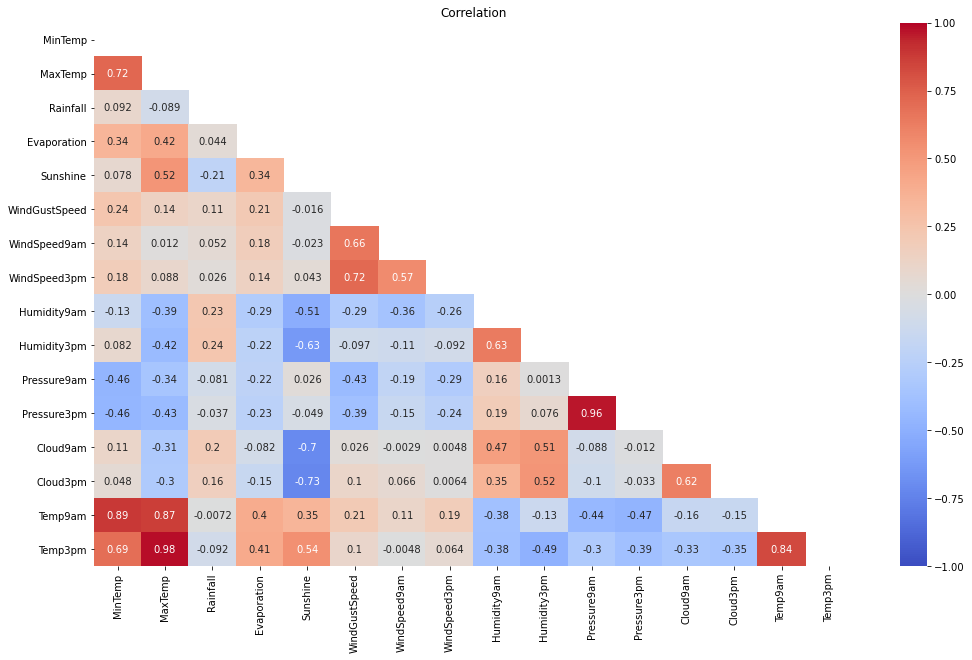

In [74]:
mask = np.triu(df[number].drop("RainTomorrow",axis=1).corr())

plt.figure(figsize=(17, 10)) 
sns.heatmap(df.drop("RainTomorrow", axis=1).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.title("Correlation") 

### mintemp maxtemp

MaxTemp skew: 0.39115104253643684
MaxTemp Kurt: -0.2369180793435408

MinTemp skew: -0.07283752391612187
MinTemp Kurt: -0.5838749983894633


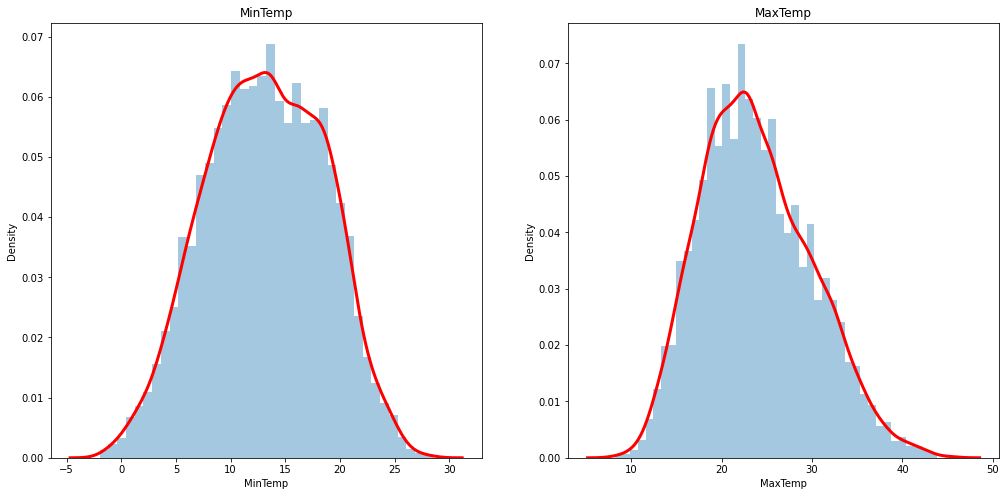

In [75]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#mintemp 
plt.subplot(121) 
sns.distplot(df.MinTemp, kde_kws={"linewidth": 3,"color": "red"})
plt.title("MinTemp")

#maxtemp
plt.subplot(122) 
sns.distplot(df.MaxTemp, kde_kws={"linewidth": 3,"color": "red"})
plt.title("MaxTemp")


print(f"MaxTemp skew: {df.MaxTemp.skew()}")
print(f"MaxTemp Kurt: {df.MaxTemp.kurt()}")
print("") 
print(f"MinTemp skew: {df.MinTemp.skew()}")
print(f"MinTemp Kurt: {df.MinTemp.kurt()}")

Text(0.5, 1.0, 'MaxTemp berdasarkan rain tomorrow')

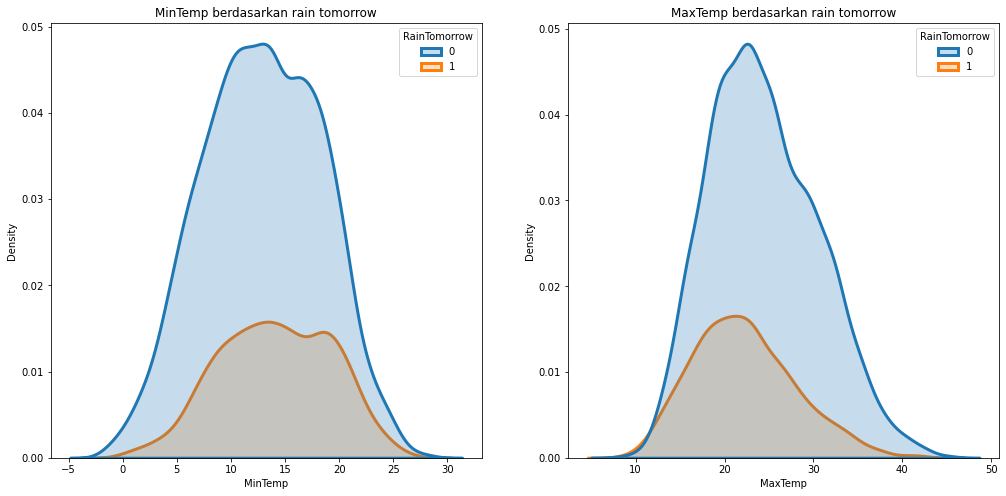

In [76]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#mintemp 
plt.subplot(121) 
sns.kdeplot(df.MinTemp, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("MinTemp berdasarkan rain tomorrow")

#maxtemp
plt.subplot(122) 
sns.kdeplot(df.MaxTemp, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("MaxTemp berdasarkan rain tomorrow")


In [77]:
#rata² min/max temp berdasarkam RainTomorrow

df.groupby("RainTomorrow")["MinTemp","MaxTemp"].mean()

,MinTemp,MaxTemp
RainTomorrow,,
0,12.843934,24.379257
1,14.102082,22.174509


In [78]:
# fill min temp berdasarkan temp9am
df["MinTemp"] = df.groupby(["Temp9am"])["MinTemp"].apply(lambda x: x.fillna(x.median())) 
df["MinTemp"].fillna(method="bfill",inplace=True)

In [79]:
# fill maxtemp berdasarkan temp3pm
df["MaxTemp"] = df.groupby(["Temp3pm"])["MaxTemp"].apply(lambda x: x.fillna(x.median())) 
df["MaxTemp"].fillna(method="bfill",inplace=True)

### Rainfall 


Rainfall skew: 13.073755675826087
Rainfall Kurt: 304.0197374273296


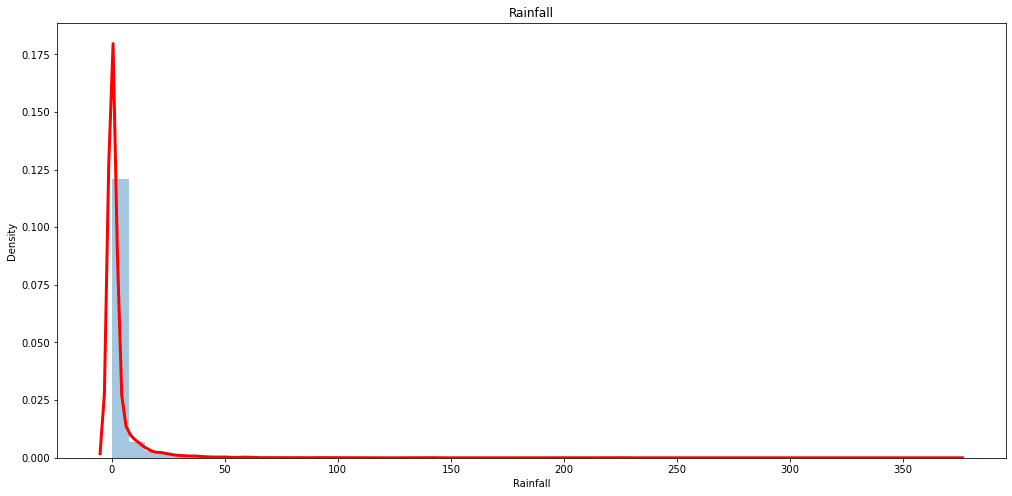

In [80]:
plt.figure(figsize=(17, 8)) 

#rainfall
sns.distplot(df.Rainfall, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Rainfall")

print(f"Rainfall skew: {df.Rainfall.skew()}")
print(f"Rainfall Kurt: {df.Rainfall.kurt()}")

In [81]:
#rata² rainfall berdasarkan RainTomorrow

df.groupby("RainTomorrow")["Rainfall"].mean().to_frame()

,Rainfall
RainTomorrow,
0,1.482453
1,7.025208


In [82]:
df.query("Rainfall > 0")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Years,Months,date,Days
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1,Monday
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5,Friday
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0,2008,12,6,Saturday
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0,2008,12,10,Wednesday
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1,2008,12,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,2012-11-02,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,NNW,9.0,17.0,71.0,55.0,1011.2,1006.9,4.0,3.0,29.2,33.1,No,1,2012,11,2,Friday
8378,2012-11-03,Darwin,23.2,33.4,31.6,13.0,6.9,SE,48.0,ESE,WNW,9.0,17.0,88.0,58.0,1010.3,1007.0,7.0,2.0,26.0,32.3,Yes,0,2012,11,3,Saturday
8381,2012-11-06,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,NNE,11.0,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,Yes,0,2012,11,6,Tuesday
8383,2012-11-08,Darwin,24.9,32.8,20.4,6.2,8.7,WNW,37.0,NNE,NW,13.0,20.0,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,Yes,0,2012,11,8,Thursday


Text(0.5, 1.0, 'Rainfall berdasarkan rain tomorrow ')

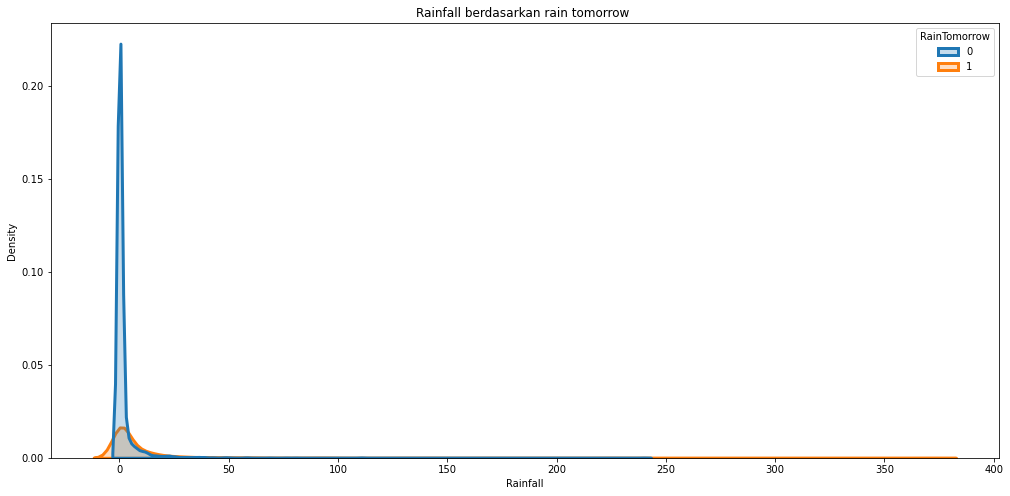

In [83]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Rainfall, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Rainfall berdasarkan rain tomorrow ") 

In [84]:
# fillna rainfall with median

df["Rainfall"].fillna(df.Rainfall.median(),inplace=True) 

### evaporation

Evaporation skew: 13.151895281926187
Evaporation Kurt: 307.6882826185026


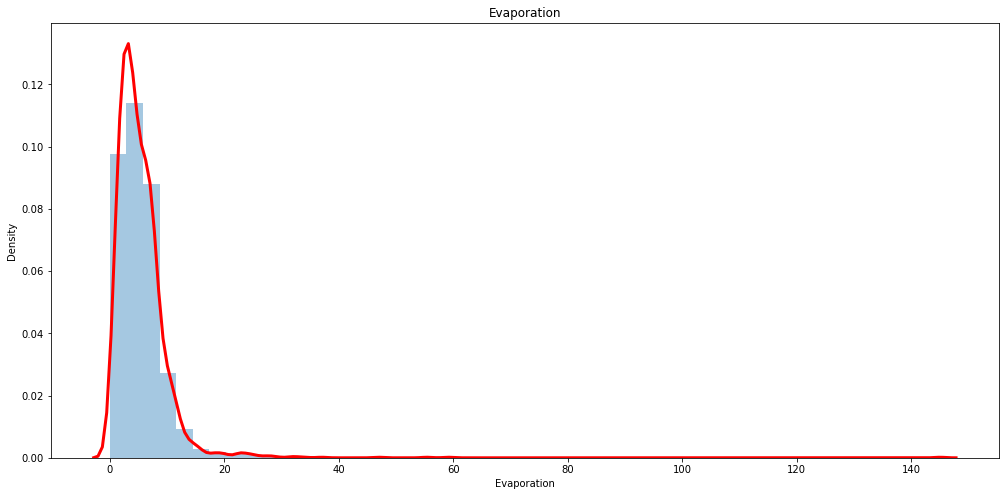

In [85]:
plt.figure(figsize=(17, 8)) 

#evaporation
sns.distplot(df.Evaporation, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Evaporation")

print(f"Evaporation skew: {df.Rainfall.skew()}")
print(f"Evaporation Kurt: {df.Rainfall.kurt()}")

Text(0.5, 1.0, 'Evaporation berdasarkan rain tomorrow ')

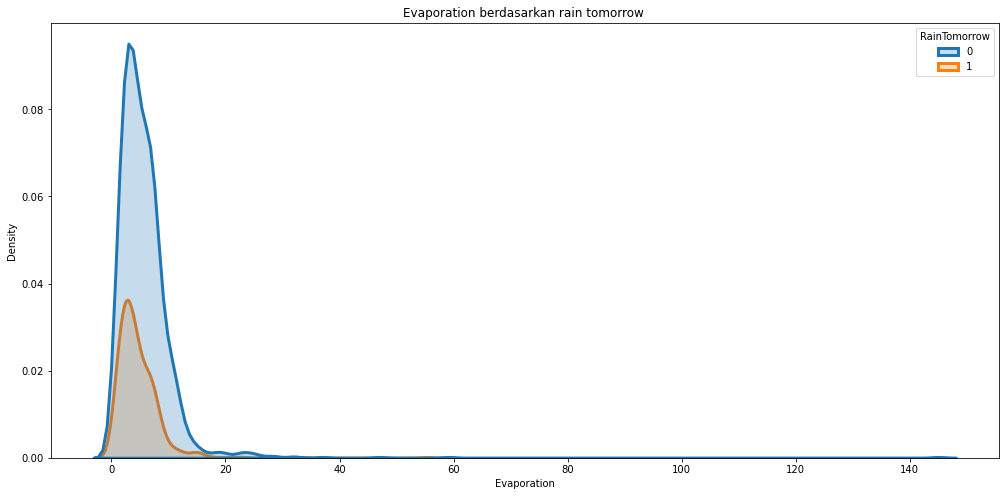

In [86]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Evaporation, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Evaporation berdasarkan rain tomorrow ") 

Text(0.5, 1.0, 'Evaporation berdasarkan rain tomorrow ')

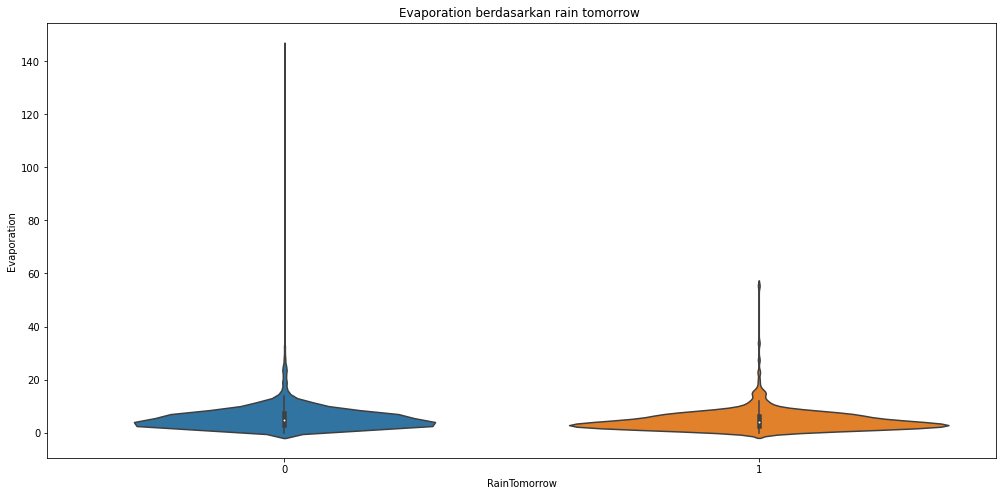

In [87]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.Evaporation, x=df.RainTomorrow) 
plt.title("Evaporation berdasarkan rain tomorrow ") 

In [88]:
df.groupby("RainTomorrow")["Evaporation"].mean().to_frame() 

,Evaporation
RainTomorrow,
0,5.643070
1,4.674517


In [89]:
# drop evaporation karena banyak nya null
df.drop("Evaporation",axis=1,inplace=True)

In [90]:
number = number.to_list()

In [91]:
#drop evaporation from numerical features

number.remove("Evaporation")

### Sunshine

Sunshine skew: -0.5418968793956308
Sunshine Kurt: -0.8327531195654219


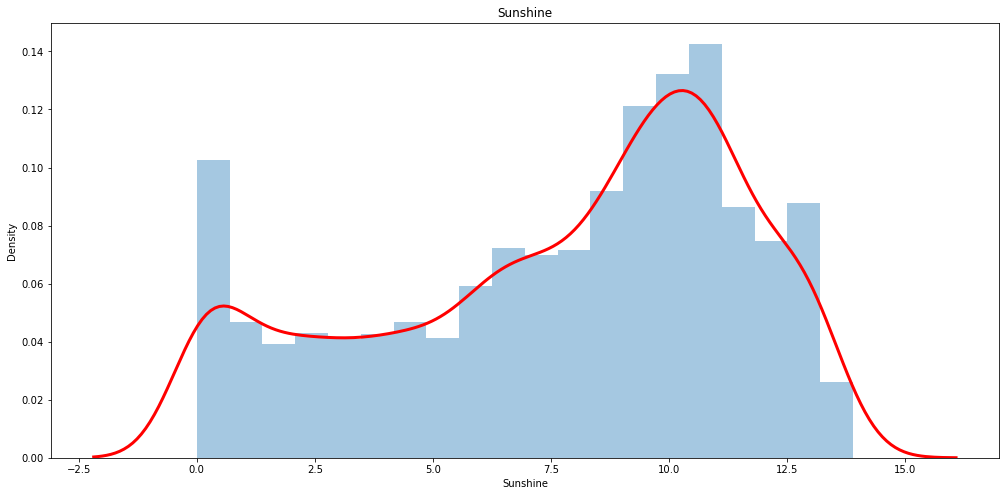

In [92]:
plt.figure(figsize=(17, 8)) 

#Sunshine
sns.distplot(df.Sunshine, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Sunshine")

print(f"Sunshine skew: {df.Sunshine.skew()}")
print(f"Sunshine Kurt: {df.Sunshine.kurt()}")

Text(0.5, 1.0, 'Sunshine berdasarkan rain tomorrow ')

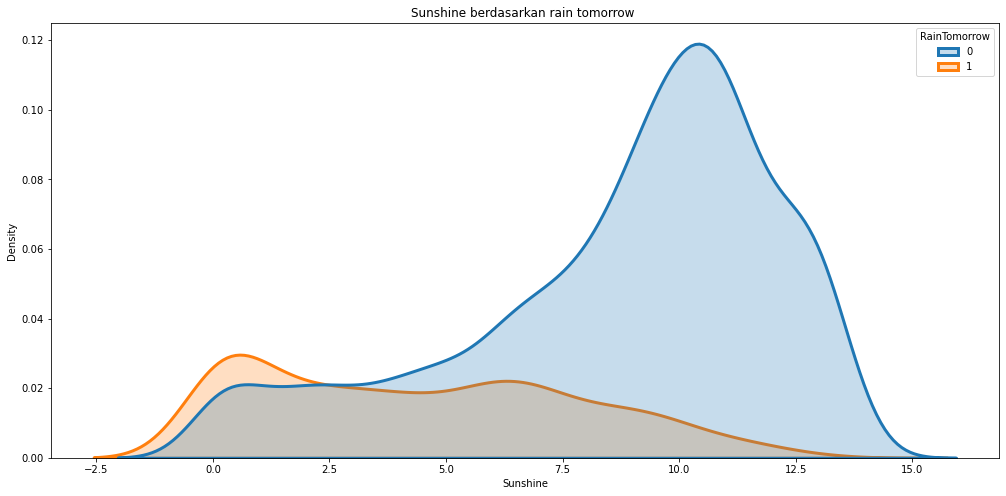

In [93]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Sunshine, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Sunshine berdasarkan rain tomorrow ") 

Text(0.5, 1.0, 'Sunshine berdasarkan rain tomorrow ')

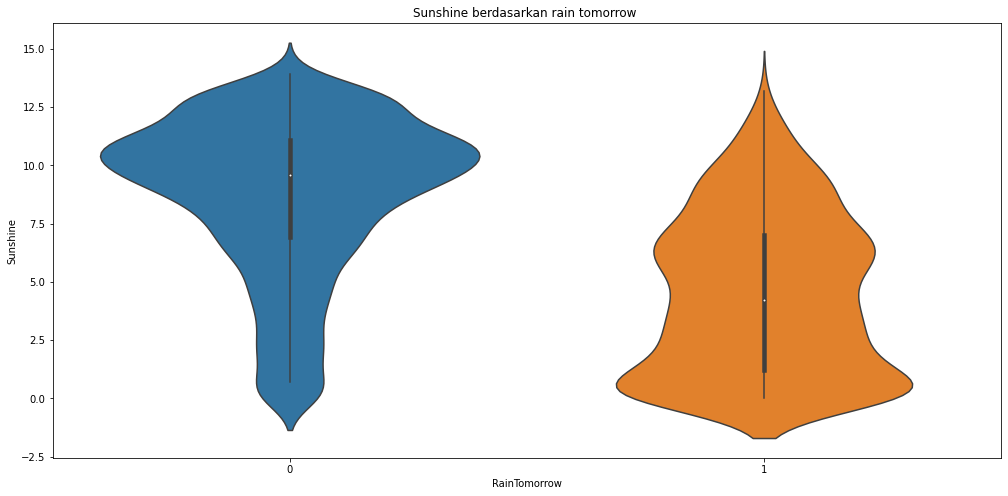

In [94]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.Sunshine, x=df.RainTomorrow) 
plt.title("Sunshine berdasarkan rain tomorrow ") 

In [95]:
# fill sunshine berdasarkan temp3pm & bfill

df["Sunshine"] = df.groupby("Temp3pm")["Sunshine"].apply(lambda x: x.fillna(x.median()))
df["Sunshine"].fillna(method="bfill",inplace=True) 

Sunshine skew: -0.6405380277575128
Sunshine Kurt: -0.4188475755322778


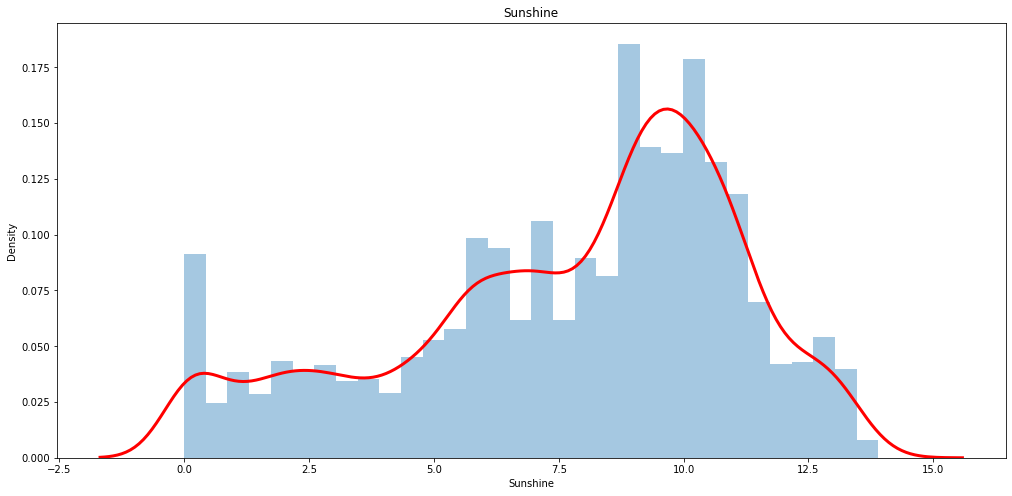

In [96]:
#after fillna 

plt.figure(figsize=(17, 8)) 

#Sunshine
sns.distplot(df.Sunshine, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Sunshine")

print(f"Sunshine skew: {df.Sunshine.skew()}")
print(f"Sunshine Kurt: {df.Sunshine.kurt()}")

Text(0.5, 1.0, 'Sunshine berdasarkan rain tomorrow ')

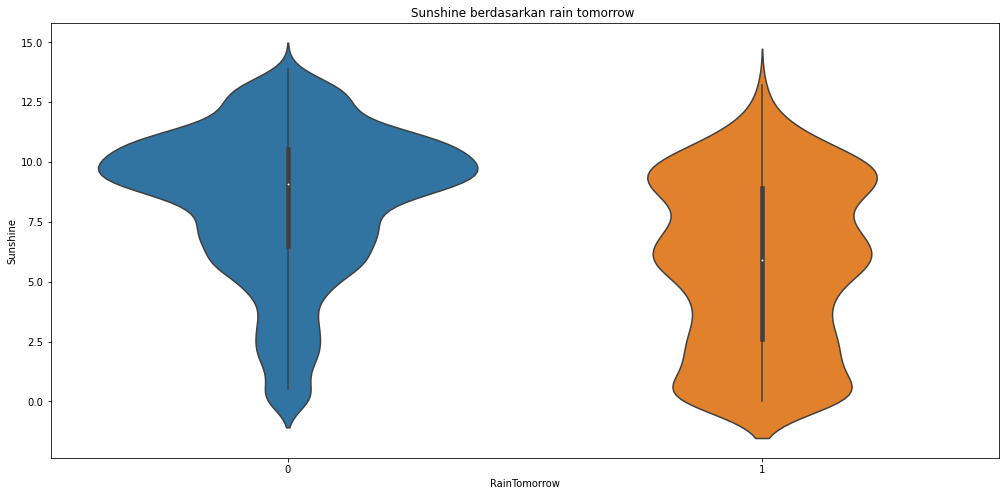

In [97]:
#after fillna 

plt.figure(figsize=(17,8))

sns.violinplot(y=df.Sunshine, x=df.RainTomorrow) 
plt.title("Sunshine berdasarkan rain tomorrow ") 

In [98]:
#rata² sunshine berdasarkan RainTomorrow
df.groupby("RainTomorrow")["Sunshine"].mean().to_frame() 

,Sunshine
RainTomorrow,
0,8.371122
1,5.695128


### windgustspeed

WindGustSpeed skew: 0.7010080252981183
WindGustSpeed Kurt: 0.49180254652151234


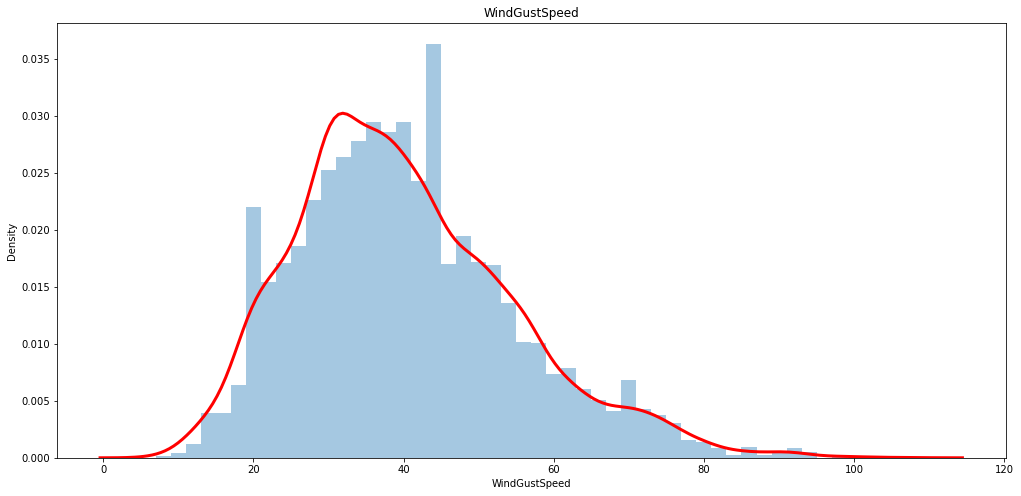

In [99]:
plt.figure(figsize=(17, 8)) 

#WindGustSpeed
sns.distplot(df.WindGustSpeed, kde_kws={"linewidth": 3,"color": "red"})
plt.title("WindGustSpeed")

print(f"WindGustSpeed skew: {df.WindGustSpeed.skew()}")
print(f"WindGustSpeed Kurt: {df.WindGustSpeed.kurt()}")

Text(0.5, 1.0, 'WindGustSpeed berdasarkan rain tomorrow ')

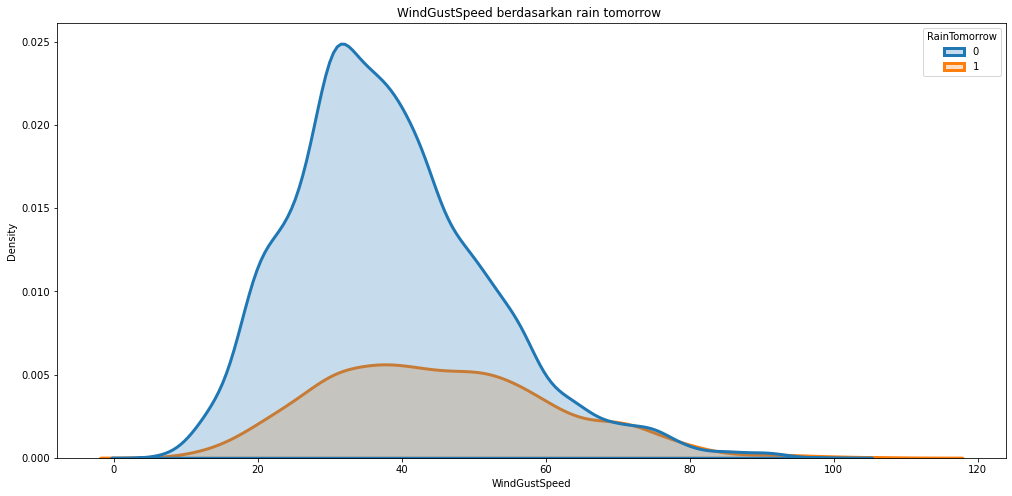

In [100]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.WindGustSpeed, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("WindGustSpeed berdasarkan rain tomorrow ") 

Text(0.5, 1.0, 'WindGustSpeed berdasarkan rain tomorrow ')

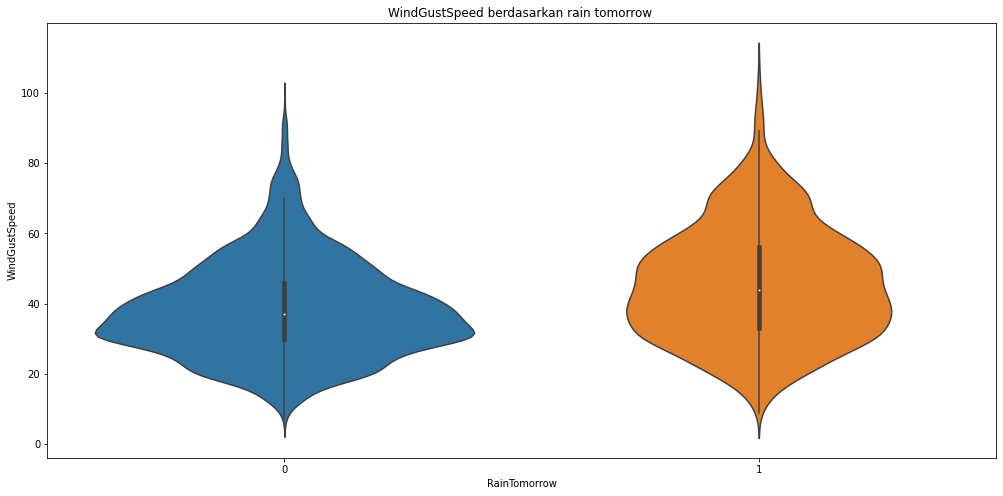

In [101]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.WindGustSpeed, x=df.RainTomorrow) 
plt.title("WindGustSpeed berdasarkan rain tomorrow ") 

In [102]:
#rata² WindGustSpeed berdasarkan RainTomorrow

df.groupby("RainTomorrow")["WindGustSpeed"].mean().to_frame()

,WindGustSpeed
RainTomorrow,
0,38.282056
1,45.482446


In [103]:
#fillna WindGustSpeed with windspeed3pm

df["WindGustSpeed"] = df.groupby("WindSpeed3pm")["WindGustSpeed"].apply(lambda x: x.fillna(x.median())) 
df["WindGustSpeed"].fillna(method ="bfill", inplace=True) 

In [104]:
#after fillna
df.groupby("RainTomorrow")["WindGustSpeed"].mean().to_frame()

,WindGustSpeed
RainTomorrow,
0,37.565456
1,43.742341


# windspeed3pm & windspeed9am

WindSpeed3pm skew: 0.5022214803208903
WindSpeed3pm Kurt: 0.3555441509314563

WindSpeed9am skew: 0.9366325919718609
WindSpeed9am Kurt: 0.9760990224826629


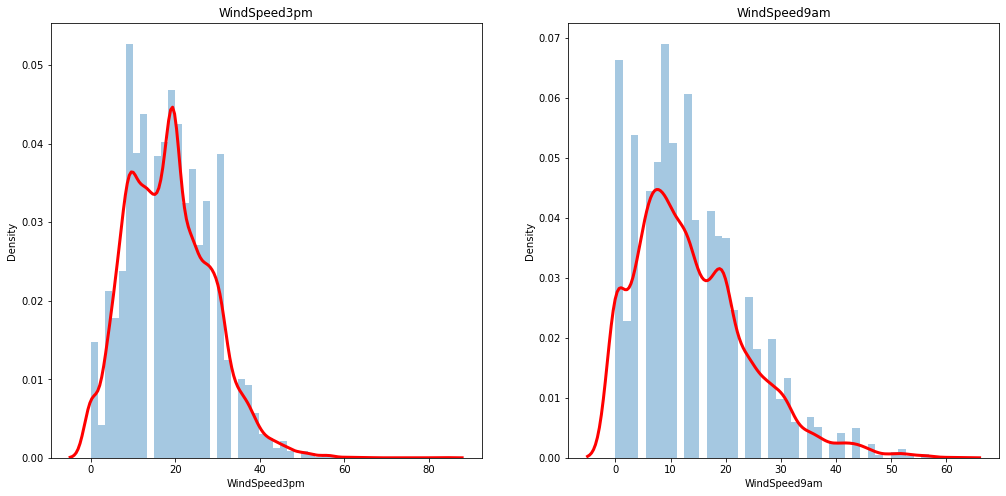

In [105]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#windspeed3pm
plt.subplot(121) 
sns.distplot(df.WindSpeed3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("WindSpeed3pm")

#windspeed9pm
plt.subplot(122) 
sns.distplot(df.WindSpeed9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("WindSpeed9am")


print(f"WindSpeed3pm skew: {df.WindSpeed3pm.skew()}")
print(f"WindSpeed3pm Kurt: {df.WindSpeed3pm.kurt()}")
print("") 
print(f"WindSpeed9am skew: {df.WindSpeed9am.skew()}")
print(f"WindSpeed9am Kurt: {df.WindSpeed9am.kurt()}")

Text(0.5, 1.0, 'WindSpedd9am berdasarkan rain tomorrow')

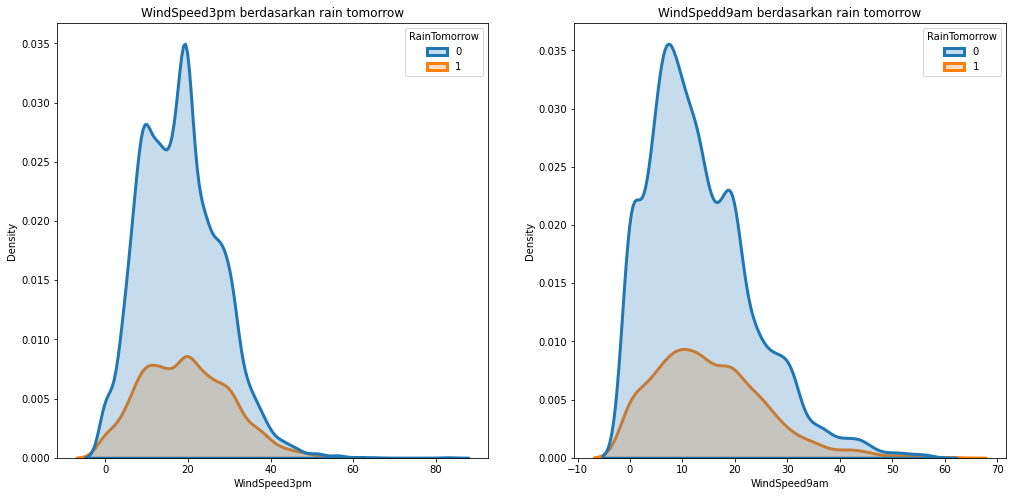

In [106]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#windspeed3pm
plt.subplot(121) 
sns.kdeplot(df.WindSpeed3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("WindSpeed3pm berdasarkan rain tomorrow")

#windspeed9am
plt.subplot(122) 
sns.kdeplot(df.WindSpeed9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("WindSpedd9am berdasarkan rain tomorrow")


In [107]:
df.groupby("RainTomorrow")["WindSpeed3pm", "WindSpeed9am"].mean()

,WindSpeed3pm,WindSpeed9am
RainTomorrow,,
0,18.152791,13.365350
1,19.476190,15.103501


In [108]:
# fillna with bfill
df["WindSpeed3pm"].fillna(method="bfill", inplace=True)
df["WindSpeed9am"].fillna(method="bfill", inplace=True)


### humidity9am & humidity3pm

Humidity3pm skew: 0.11951533406296795
Humidity3pm Kurt: -0.342337285658747

Humidity9am skew: -0.2538320791593803
Humidity9am Kurt: -0.38426740148392025


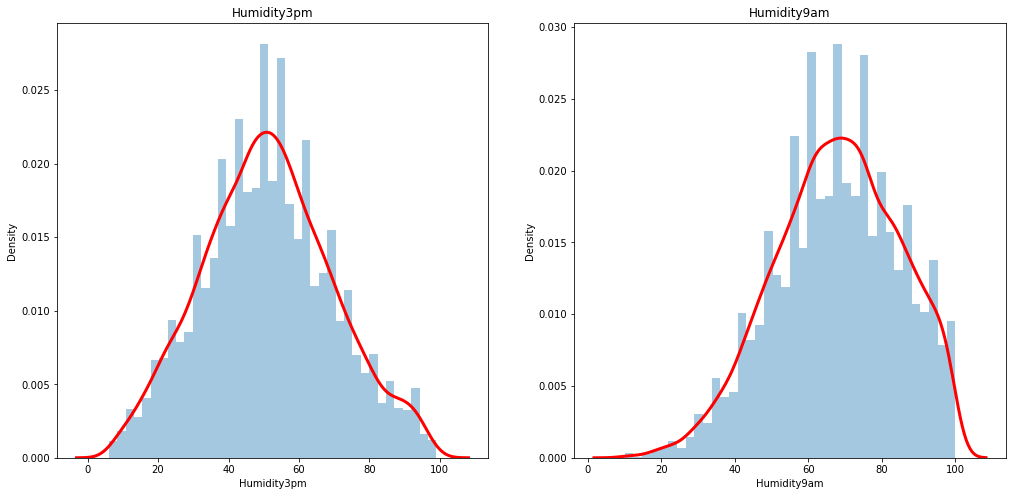

In [109]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#humidity3pm
plt.subplot(121) 
sns.distplot(df.Humidity3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Humidity3pm")

#Humidity9pm
plt.subplot(122) 
sns.distplot(df.Humidity9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Humidity9am")


print(f"Humidity3pm skew: {df.Humidity3pm.skew()}")
print(f"Humidity3pm Kurt: {df.Humidity3pm.kurt()}")
print("") 
print(f"Humidity9am skew: {df.Humidity9am.skew()}")
print(f"Humidity9am Kurt: {df.Humidity9am.kurt()}")

Text(0.5, 1.0, 'Humidity9am berdasarkan rain tomorrow')

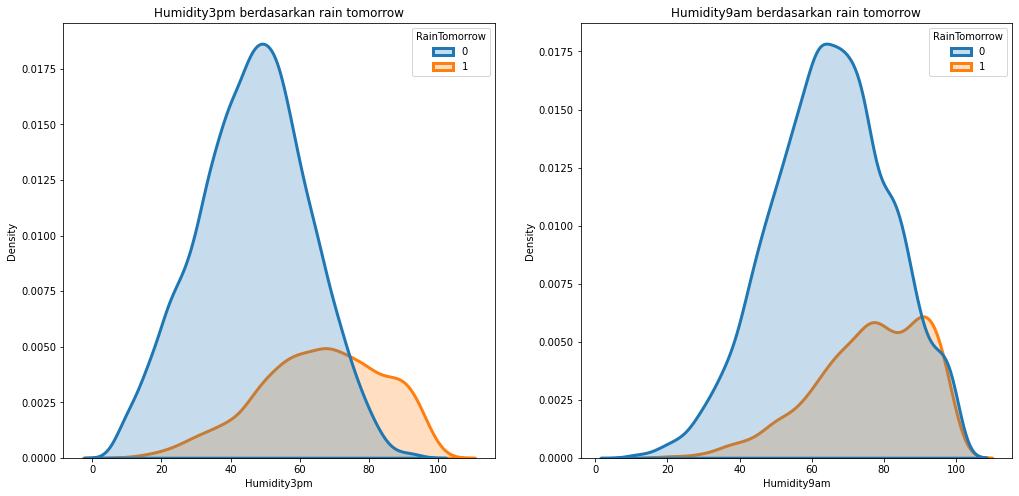

In [110]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Humidity3pm
plt.subplot(121) 
sns.kdeplot(df.Humidity3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("Humidity3pm berdasarkan rain tomorrow")

#Humidity9am
plt.subplot(122) 
sns.kdeplot(df.Humidity9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("Humidity9am berdasarkan rain tomorrow")


Text(0.5, 1.0, 'Humidity9am berdasarkan rain tomorrow')

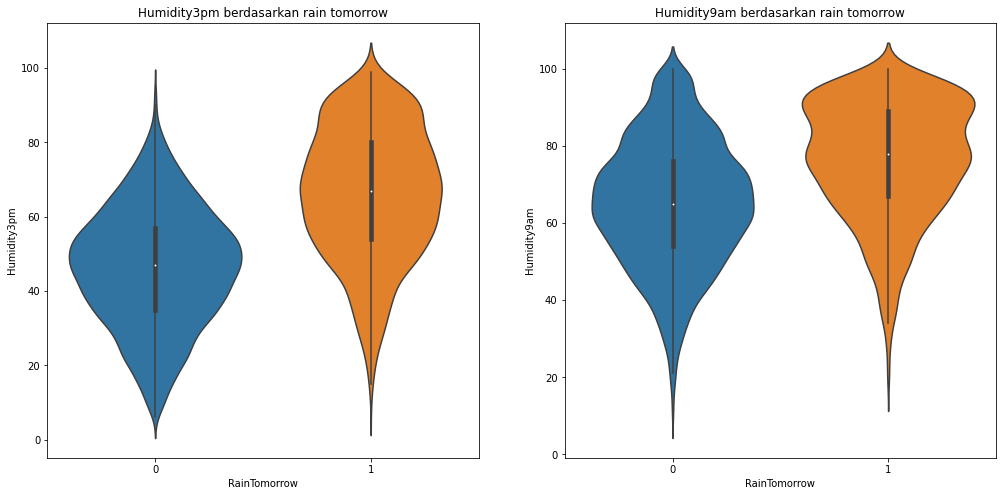

In [111]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Humidity3pm
plt.subplot(121) 
sns.violinplot(y = df.Humidity3pm, x=df.RainTomorrow) 
plt.title("Humidity3pm berdasarkan rain tomorrow")

#Humidity9am
plt.subplot(122) 
sns.violinplot(y= df.Humidity9am, x=df.RainTomorrow) 
plt.title("Humidity9am berdasarkan rain tomorrow")


In [112]:
df.groupby("RainTomorrow")["Humidity3pm", "Humidity9am"].mean()

,Humidity3pm,Humidity9am
RainTomorrow,,
0,46.398695,65.076362
1,66.024835,76.070922


In [113]:
#fillna humidity3pm berdasarkan humidity 9am
df["Humidity3pm"] = df.groupby("Humidity9am")["Humidity3pm"].apply(lambda x: x.fillna(x.median())) 
df["Humidity3pm"].fillna(method="bfill", inplace=True) 

In [114]:
#fillna humidity9am berdasarkan humidity 3pm
df["Humidity9am"] = df.groupby("Humidity3pm")["Humidity9am"].apply(lambda x: x.fillna(x.median()))
df["Humidity9am"].fillna(method="bfill", inplace=True) 

In [115]:
df.groupby("RainTomorrow")["Humidity3pm", "Humidity9am"].mean()

,Humidity3pm,Humidity9am
RainTomorrow,,
0,46.444794,65.099435
1,66.024360,76.072828


### pressure3pm & pressure9am

Pressure3pm skew: -0.01461172354859812
Pressure3pm Kurt: 0.042441305921894656

Pressure9am skew: -0.029803689077504646
Pressure9am Kurt: 0.04730386901989547


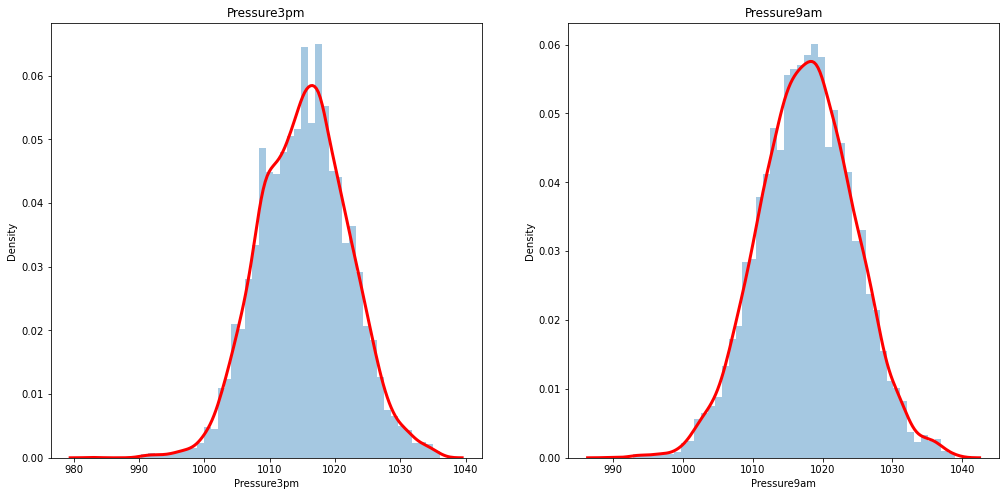

In [116]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#pressure3pm
plt.subplot(121) 
sns.distplot(df.Pressure3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Pressure3pm")

#pressure9am
plt.subplot(122) 
sns.distplot(df.Pressure9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Pressure9am")


print(f"Pressure3pm skew: {df.Pressure3pm.skew()}")
print(f"Pressure3pm Kurt: {df.Pressure3pm.kurt()}")
print("") 
print(f"Pressure9am skew: {df.Pressure9am.skew()}")
print(f"Pressure9am Kurt: {df.Pressure9am.kurt()}")

Text(0.5, 1.0, 'Pressure9am berdasarkan rain tomorrow')

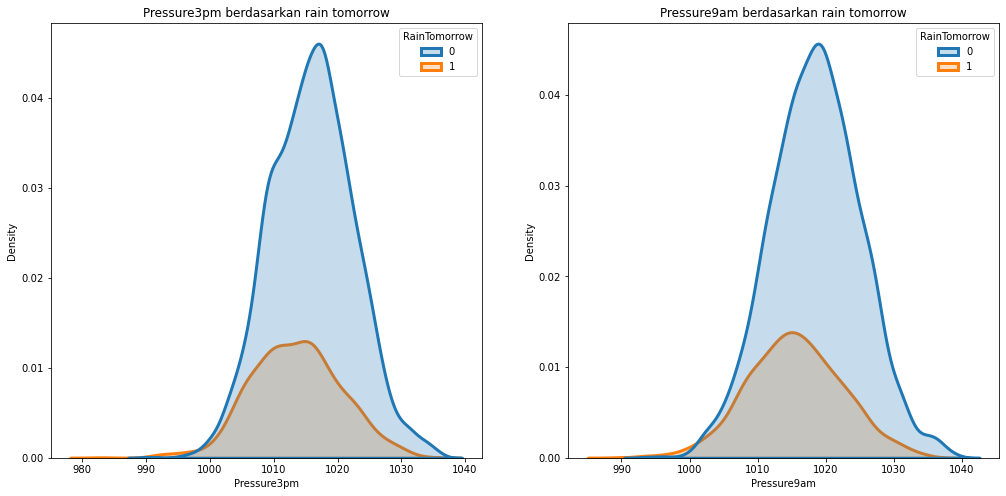

In [117]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#pressure3pm
plt.subplot(121) 
sns.kdeplot(df.Pressure3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("Pressure3pm berdasarkan rain tomorrow")

#Pressure9am
plt.subplot(122) 
sns.kdeplot(df.Pressure9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("Pressure9am berdasarkan rain tomorrow")


In [118]:
df.groupby("RainTomorrow")["Pressure3pm", "Pressure9am"].mean()

,Pressure3pm,Pressure9am
RainTomorrow,,
0,1015.903776,1018.441671
1,1013.440513,1015.443948


In [119]:
# buat feature baru "rata² pressure" 9am&3pm karena tidak ada perbedaan antara 9am&3pm

pressure = df[["Pressure3pm","Pressure9am"]].mean(axis=1)

In [120]:
pressure

0       1007.40
1       1009.20
2       1008.15
3       1015.20
4       1008.40
         ...   
8419    1022.95
8420    1022.45
8421    1021.30
8422    1018.90
8423    1017.95
Length: 8186, dtype: float64

In [121]:
pressure.isnull().sum()

1288

In [122]:
pressure.describe() 

count    6898.000000
mean     1016.511003
std         6.732286
min       986.350000
25%      1011.750000
50%      1016.600000
75%      1021.037500
max      1037.300000
dtype: float64

Pressure skew: -0.002905355076360517
Pressure Kurt: 0.032950686915885985


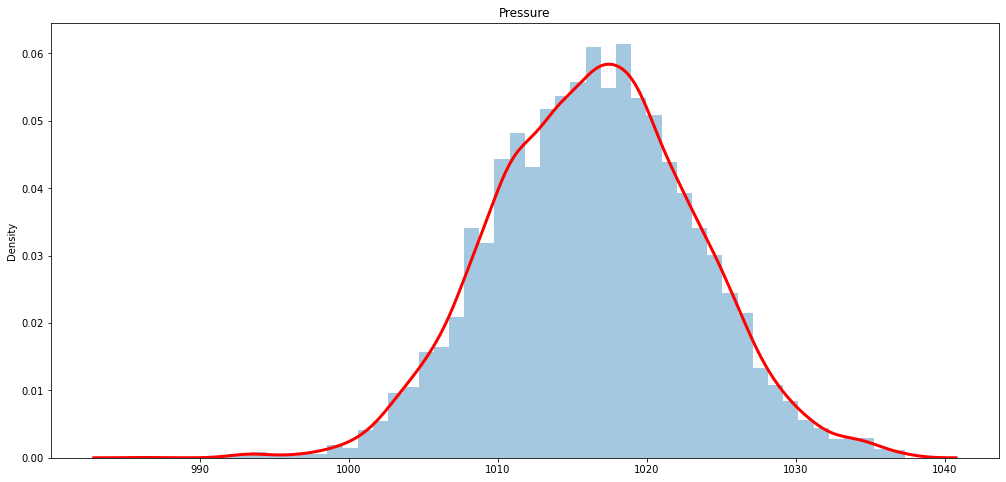

In [123]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#pressures
sns.distplot(pressure, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Pressure")

print(f"Pressure skew: {pressure.skew()}")
print(f"Pressure Kurt: {pressure.kurt()}")

Text(0.5, 1.0, 'Pressure berdasarkan rain tomorrow')

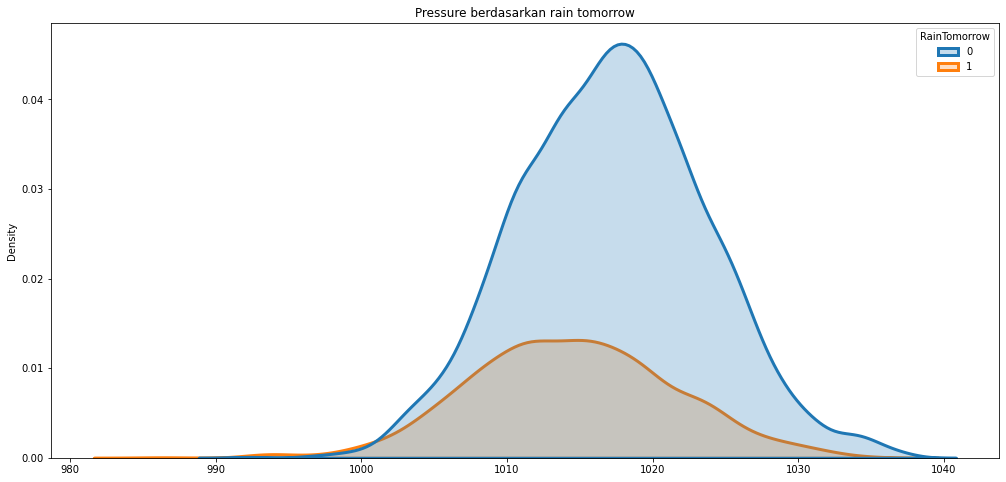

In [124]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#pressure
sns.kdeplot(pressure, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Pressure berdasarkan rain tomorrow")


In [125]:
df["Pressure"] = df[["Pressure3pm","Pressure9am"]].mean(axis=1) 

In [126]:
# fillna pressure berdasarkan windgustspeed

df["Pressure"] = df.groupby("WindGustSpeed")["Pressure"].apply(lambda x:  x.fillna(x.median())) 

In [127]:
#after fillna 

df.groupby("RainTomorrow")["Pressure"].mean().to_frame()

,Pressure
RainTomorrow,
0,1017.419622
1,1015.095360


### Cloud9am & Cloud3pm

Cloud3pm skew: -0.22219575665555066
Cloud3pm Kurt: -1.4703009946791963

Cloud9am skew: -0.28817199176017716
Cloud9am Kurt: -1.5076871003378838


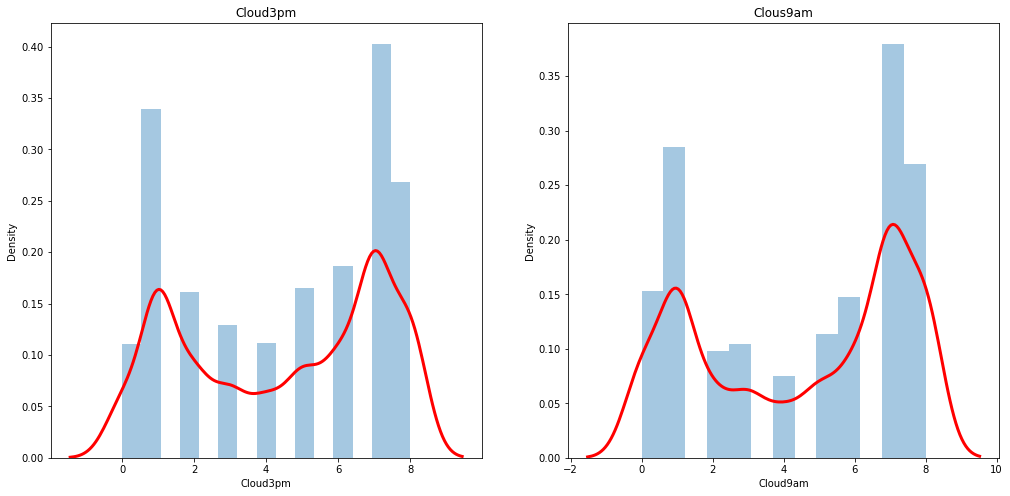

In [128]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Cloud3pm
plt.subplot(121) 
sns.distplot(df.Cloud3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Cloud3pm")

#Cloud9am
plt.subplot(122) 
sns.distplot(df.Cloud9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Clous9am")


print(f"Cloud3pm skew: {df.Cloud3pm.skew()}")
print(f"Cloud3pm Kurt: {df.Cloud3pm.kurt()}")
print("") 
print(f"Cloud9am skew: {df.Cloud9am.skew()}")
print(f"Cloud9am Kurt: {df.Cloud9am.kurt()}")

Text(0.5, 1.0, 'Cloud 9am berdasarkan rain tomorrow')

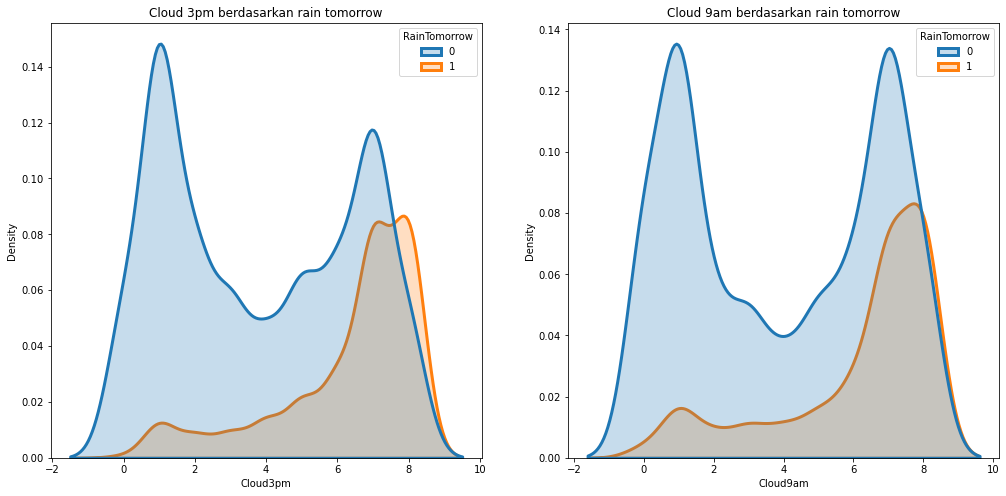

In [129]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Cloud3pm
plt.subplot(121) 
sns.kdeplot(df.Cloud3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("Cloud 3pm berdasarkan rain tomorrow")

#Cloud9am
plt.subplot(122) 
sns.kdeplot(df.Cloud9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("Cloud 9am berdasarkan rain tomorrow")


In [130]:
df.groupby("RainTomorrow")["Cloud3pm","Cloud9am"].mean()

,Cloud3pm,Cloud9am
RainTomorrow,,
0,3.811900,3.953789
1,6.290038,6.114231


In [131]:
# satukan cloud 3pm & 9am menjadi rata² cloud 
#karena distribution & distribution berdasatkan target yang sama 

Cloud = df[["Cloud3pm", "Cloud9am"]].mean(axis=1) 

In [132]:
Cloud.describe()

count    6256.000000
mean        4.531570
std         2.568347
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         8.000000
dtype: float64

In [133]:
Cloud.isnull().sum()

1930

Cloud skew: -0.2692869399423908
Cloud Kurt: -1.288739761544297


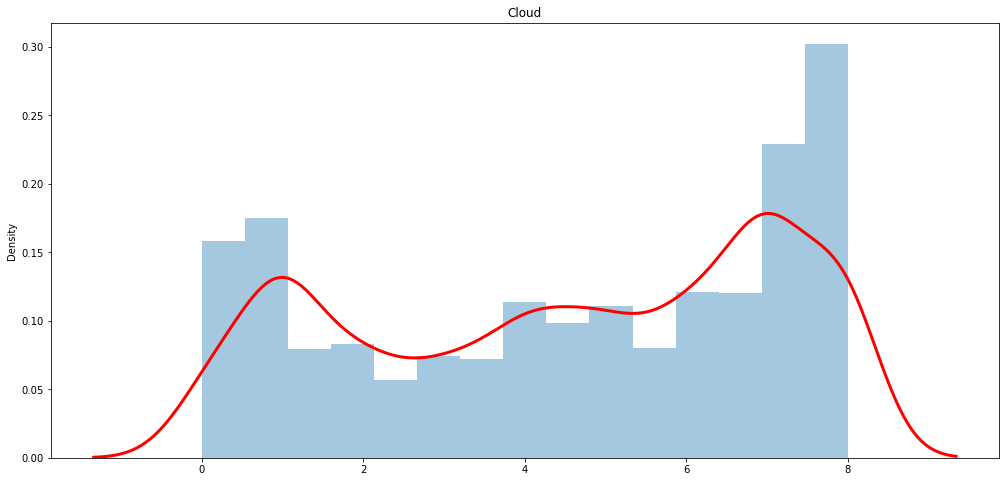

In [134]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Cloud
sns.distplot(Cloud, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Cloud")

print(f"Cloud skew: {Cloud.skew()}")
print(f"Cloud Kurt: {Cloud.kurt()}")

Text(0.5, 1.0, 'Cloud berdasarkan rain tomorrow')

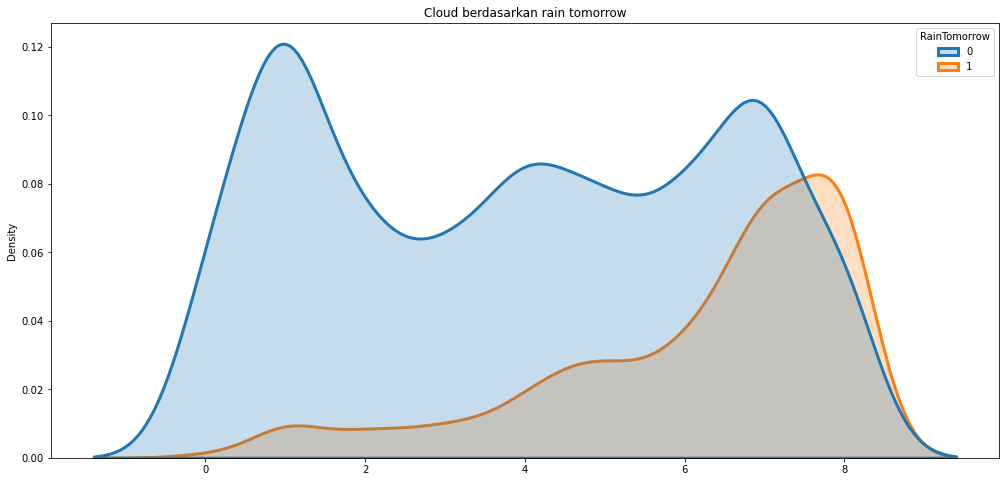

In [135]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Cloud
sns.kdeplot(Cloud, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Cloud berdasarkan rain tomorrow")


In [136]:
df["Cloud"] = df[["Cloud3pm","Cloud9am"]].mean(axis=1)

In [137]:
df.groupby("RainTomorrow")["Cloud"].mean().to_frame()

,Cloud
RainTomorrow,
0,3.943261
1,6.165761


In [138]:
# fillna cloud berdasarkan humidity 3pm

df["Cloud"] = df.groupby("Humidity3pm")["Cloud"].apply(lambda x: x.fillna(x.median())) 

In [139]:
df.Cloud.isnull().sum()

0

In [140]:
#after fillna 

df.groupby("RainTomorrow")["Cloud"].mean().to_frame()

,Cloud
RainTomorrow,
0,3.802906
1,5.990331


### temp3pm & temp9am

Temp3pm skew: 0.40239517275769066
Temp3pm Kurt: -0.16350460704667036

Temp9am skew: -0.008431004875121152
Temp9am Kurt: -0.4407328709804741


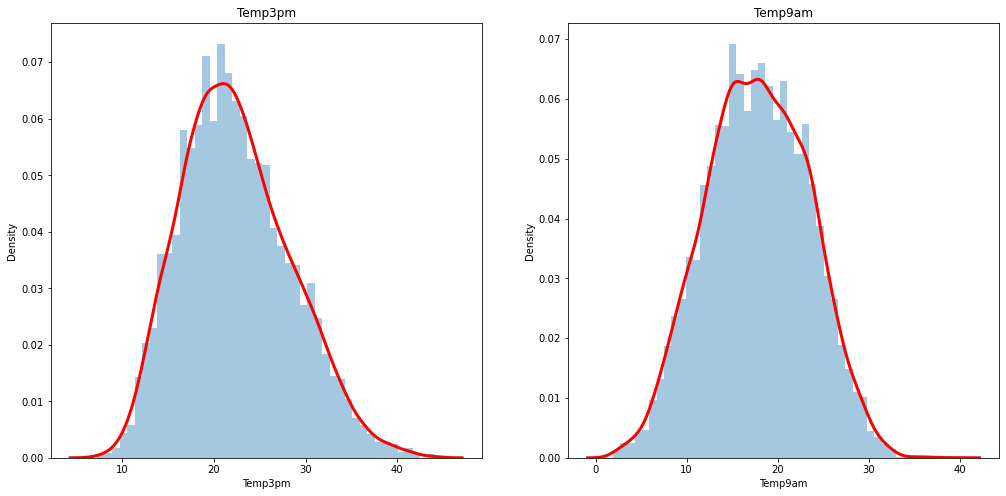

In [141]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Temp3pm
plt.subplot(121) 
sns.distplot(df.Temp3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Temp3pm")

#Temp9am
plt.subplot(122) 
sns.distplot(df.Temp9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Temp9am")


print(f"Temp3pm skew: {df.Temp3pm.skew()}")
print(f"Temp3pm Kurt: {df.Temp3pm.kurt()}")
print("") 
print(f"Temp9am skew: {df.Temp9am.skew()}")
print(f"Temp9am Kurt: {df.Temp9am.kurt()}")

Text(0.5, 1.0, 'Temp 9am berdasarkan rain tomorrow')

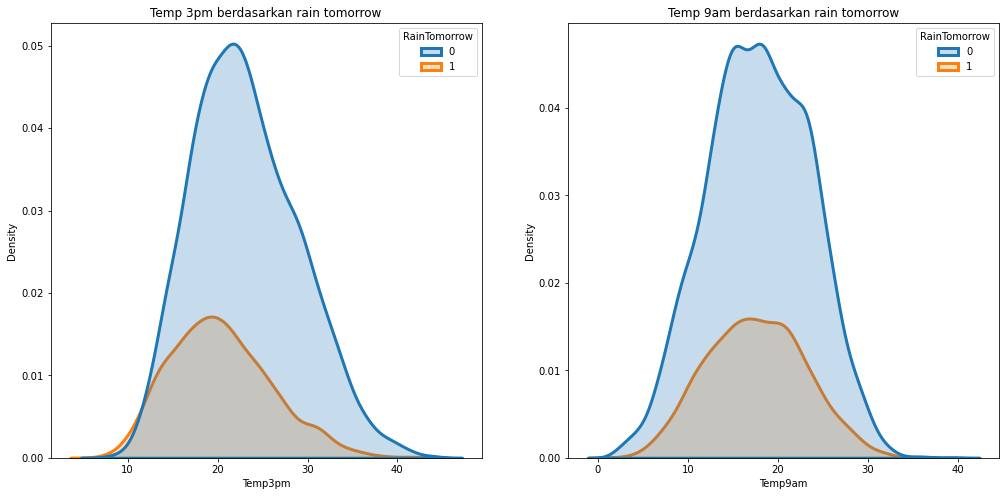

In [142]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Temp3pm
plt.subplot(121) 
sns.kdeplot(df.Temp3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("Temp 3pm berdasarkan rain tomorrow")

#Temp9am
plt.subplot(122) 
sns.kdeplot(df.Temp9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("Temp 9am berdasarkan rain tomorrow")


In [143]:
df.groupby("RainTomorrow")["Temp3pm","Temp9am"].mean()

,Temp3pm,Temp9am
RainTomorrow,,
0,23.099674,17.814992
1,20.354785,17.526127


In [144]:
# fillna temp3pm berdasarkan maxtempdf
df["Temp3pm"] = df.groupby("MaxTemp")["Temp3pm"].apply(lambda x: x.fillna(x.median())) 

In [145]:
# fillna temp9am berdasarkan mintemp
df["Temp9am"] = df.groupby("MinTemp")["Temp9am"].apply(lambda x: x.fillna(x.median())) 

### final

In [146]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Years,Months,date,Days,Pressure,Cloud
0,2008-12-01,Albury,13.4,22.9,0.6,9.40,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1,Monday,1007.40,8.0
1,2008-12-02,Albury,7.4,25.1,0.0,9.70,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2,Tuesday,1009.20,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,9.65,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3,Wednesday,1008.15,2.0
3,2008-12-04,Albury,9.2,28.0,0.0,9.30,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4,Thursday,1015.20,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,10.30,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5,Friday,1008.40,7.5


In [147]:
#drop useless columns

usl = ["Date", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm"]
df.drop(usl, axis=1, inplace=True) 

In [148]:
# descriptive analytics of nukerical features
df.describe() 

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow,Pressure,Cloud
count,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8166.000000,8186.000000
mean,13.145877,23.863945,2.765820,7.720266,39.067799,13.758490,18.414610,67.768385,51.206939,17.745224,22.443355,0.243220,1016.853784,4.334932
std,5.416106,6.107903,10.421426,3.398372,14.841823,10.169447,9.823854,16.812941,18.367023,5.621639,5.946251,0.429053,6.355285,2.435111
min,-2.000000,8.200000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,1.900000,7.300000,0.000000,986.350000,0.000000
25%,9.125000,19.300000,0.000000,5.700000,28.000000,6.000000,11.000000,56.000000,39.000000,13.800000,18.100000,0.000000,1012.600000,2.000000
50%,13.200000,23.300000,0.000000,8.625000,37.000000,13.000000,19.000000,68.000000,51.000000,17.700000,21.900000,0.000000,1017.400000,4.500000
75%,17.300000,28.000000,0.800000,10.200000,48.000000,20.000000,24.000000,80.000000,63.000000,21.900000,26.400000,0.000000,1021.050000,6.500000
max,28.500000,45.500000,371.000000,13.900000,107.000000,61.000000,83.000000,100.000000,99.000000,39.400000,44.100000,1.000000,1037.300000,8.000000


In [149]:
# descriptive analytics of categoricala features
df.describe(exclude="number") 

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Years,Months,date,Days
count,8186,8186,8186,8186,8186,8186,8186,8186,8186
unique,12,16,16,16,2,10,12,31,7
top,Melbourne,N,N,SE,No,2010,6,20,Sunday
freq,1502,770,1025,866,6227,1436,800,279,1191


In [150]:
df.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Years,Months,date,Days,Pressure,Cloud
1603,Newcastle,9.6,23.0,1.4,7.85,NW,20.0,NW,SE,0.0,4.0,84.0,55.0,15.5,21.5,Yes,0,2013,9,2,Monday,1021.050,0.5
1937,Newcastle,4.8,15.8,0.0,4.10,N,35.0,SW,SE,4.0,19.0,62.0,45.0,9.6,14.8,No,0,2014,8,2,Saturday,1017.625,3.0
7213,PerthAirport,6.9,22.2,0.0,10.60,WSW,33.0,NNE,WSW,4.0,17.0,55.0,43.0,18.2,20.9,No,0,2011,10,5,Wednesday,1019.400,4.5
2041,Newcastle,16.4,39.2,0.0,11.60,NW,33.0,SW,NW,0.0,15.0,74.0,18.0,23.5,38.4,No,0,2014,11,14,Friday,1018.225,2.0
7942,PerthAirport,15.4,24.8,0.4,11.20,WSW,39.0,SSW,WSW,11.0,22.0,60.0,49.0,20.6,23.9,No,0,2013,12,1,Sunday,1014.950,4.0
6486,Brisbane,21.1,29.6,0.0,9.70,ENE,37.0,ESE,ESE,13.0,11.0,58.0,56.0,26.9,28.1,No,0,2012,1,22,Sunday,1013.300,7.0
2197,Newcastle,16.8,23.3,4.0,9.00,SSE,63.0,SSW,SE,0.0,37.0,88.0,66.0,19.3,20.3,Yes,1,2015,4,19,Sunday,1011.400,6.5
837,Albury,12.8,26.3,0.0,9.90,SE,20.0,SSE,SSE,9.0,11.0,77.0,47.0,16.2,25.2,No,0,2011,3,18,Friday,1013.900,1.0
1941,Newcastle,4.4,20.2,0.0,6.25,N,20.0,SE,NW,0.0,4.0,80.0,42.0,12.0,20.0,No,0,2014,8,6,Wednesday,1021.050,0.0
2732,Penrith,10.6,14.6,3.4,5.20,NNE,15.0,NNE,N,4.0,7.0,93.0,88.0,13.5,14.4,Yes,1,2015,6,16,Tuesday,1024.200,7.0


In [151]:
print(df.isnull().any().sum())
print(df.duplicated().sum())
print(df.shape)

1
1562
(8186, 23)


In [176]:
# make a new clean file 
df.to_csv("WeatherAUS(clean).csv",index=False)